# Portugese Bank Classification Project

## Project Aims and Objectives
- Analyse the dataset features and report insights found.
- Create a machine learning model to help the bank marketing team predict if a client will buy the product.
- Recommend suggestions for the bank market team to make clients buy the product.


#### Project Code: PRCP-1000-ProtugeseBank

## Import Libraries and Install Dependencies

In [ ]:
%pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 38.7 MB/s eta 0:00:00


In [ ]:
%pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import sweetviz as sv

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Understanding

In [ ]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/Datamites/PortugeseBank/bank-additional-full.csv', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
for col in df.columns:
  if str(df.dtypes[col]) == 'object':
    print(f'{col} unique values: {df[col].unique()}')
    print()

job unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital unique values: ['married' 'single' 'divorced' 'unknown']

education unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default unique values: ['no' 'unknown' 'yes']

housing unique values: ['no' 'yes' 'unknown']

loan unique values: ['no' 'yes' 'unknown']

contact unique values: ['telephone' 'cellular']

month unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week unique values: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome unique values: ['nonexistent' 'failure' 'success']

y unique values: ['no' 'yes']



#### Check Missing Values

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Check Duplicated Records

In [ ]:
df.duplicated().sum()

12

## Exploratory Data Analysis

### Data Cleaning

In [ ]:
clean_data = df.copy()

In [ ]:
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
clean_data.shape

(41188, 21)

#### Handle Duplicate Rows

In [ ]:
clean_data = clean_data.drop_duplicates()

In [ ]:
clean_data.duplicated().sum()

0

In [ ]:
clean_data.shape

(41176, 21)

#### Handle Missing Values

In [ ]:
pout_nonexistant = len(clean_data['poutcome'][clean_data['poutcome'] == 'nonexistent']) / len(clean_data['poutcome']) * 100

print(f'Percentage of values in poutcome feature that are nonexistent: {round(pout_nonexistant, 2)}%')

Percentage of values in poutcome feature that are nonexistent: 86.34%


In [ ]:
print('Percent of unknown values in each feature:')
(clean_data == 'unknown').mean() * 100

Percent of unknown values in each feature:


age                0.000000
job                0.801438
marital            0.194288
education          4.201477
default           20.876239
housing            2.404313
loan               2.404313
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [ ]:
percent_unknown = len(clean_data[
    (clean_data['job'] == 'unknown') |
    (clean_data['marital'] == 'unknown') |
    (clean_data['education'] == 'unknown') |
    (clean_data['default'] == 'unknown') |
    (clean_data['housing'] == 'unknown') |
    (clean_data['loan'] == 'unknown')
]) / len(clean_data) * 100
print(f'Percent of records in dataset with unknown values in features: {round(percent_unknown, 2)}%')

Percent of records in dataset with unknown values in features: 25.98%


- There are no null values, but there is data with value unknown or non-existent which is not useful and is essentially missing data.
- The poutcome feature has 86.34% values which makes it not useful so this feature can be dropped.
- Another 25.98% records in the data have unknown values in the features job, marital, education, default, housing, or loan.
- These records will be dropped before the analysis.

In [ ]:
clean_data = clean_data.drop(['poutcome'], axis=1)

clean_data = clean_data.drop(
    clean_data[
        (clean_data['job'] == 'unknown') |
        (clean_data['marital'] == 'unknown') |
        (clean_data['education'] == 'unknown') |
        (clean_data['default'] == 'unknown') |
        (clean_data['housing'] == 'unknown') |
        (clean_data['loan'] == 'unknown')
    ].index,
    axis=0
)

In [ ]:
clean_data.shape

(30478, 20)

#### Handle Outliers

- Outliers in the features are detected using the Inter Quartile Range (IQR) and removed from the dataset.

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

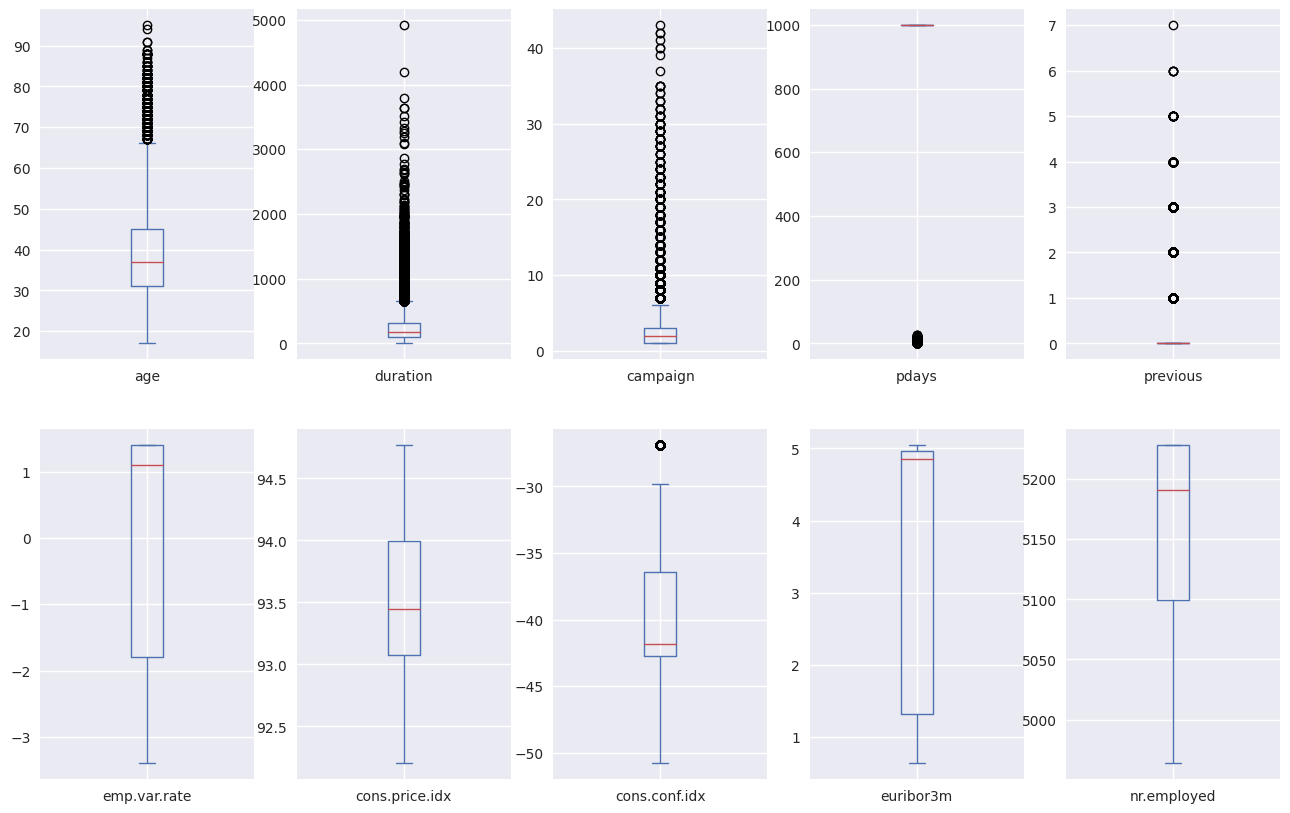

In [ ]:
clean_data.plot(kind="box", subplots=True, figsize=(16, 10), layout=(2, 5))

##### Client Age Feature

In [ ]:
Q1 = clean_data['age'].quantile(0.25)
Q3 = clean_data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_data = clean_data[
    (clean_data['age'] >= lower_bound) &
    (clean_data['age'] <= upper_bound)
]

##### Client Contact Duration Feature

In [ ]:
Q1 = clean_data['duration'].quantile(0.20)
Q3 = clean_data['duration'].quantile(0.80)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_data = clean_data[
    (clean_data['duration'] >= lower_bound) &
    (clean_data['duration'] <= upper_bound)
]

##### Client Campaign Feature

In [ ]:
Q1 = clean_data['campaign'].quantile(0.10)
Q3 = clean_data['campaign'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_data = clean_data[
    (clean_data['campaign'] >= lower_bound) &
    (clean_data['campaign'] <= upper_bound)
]

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

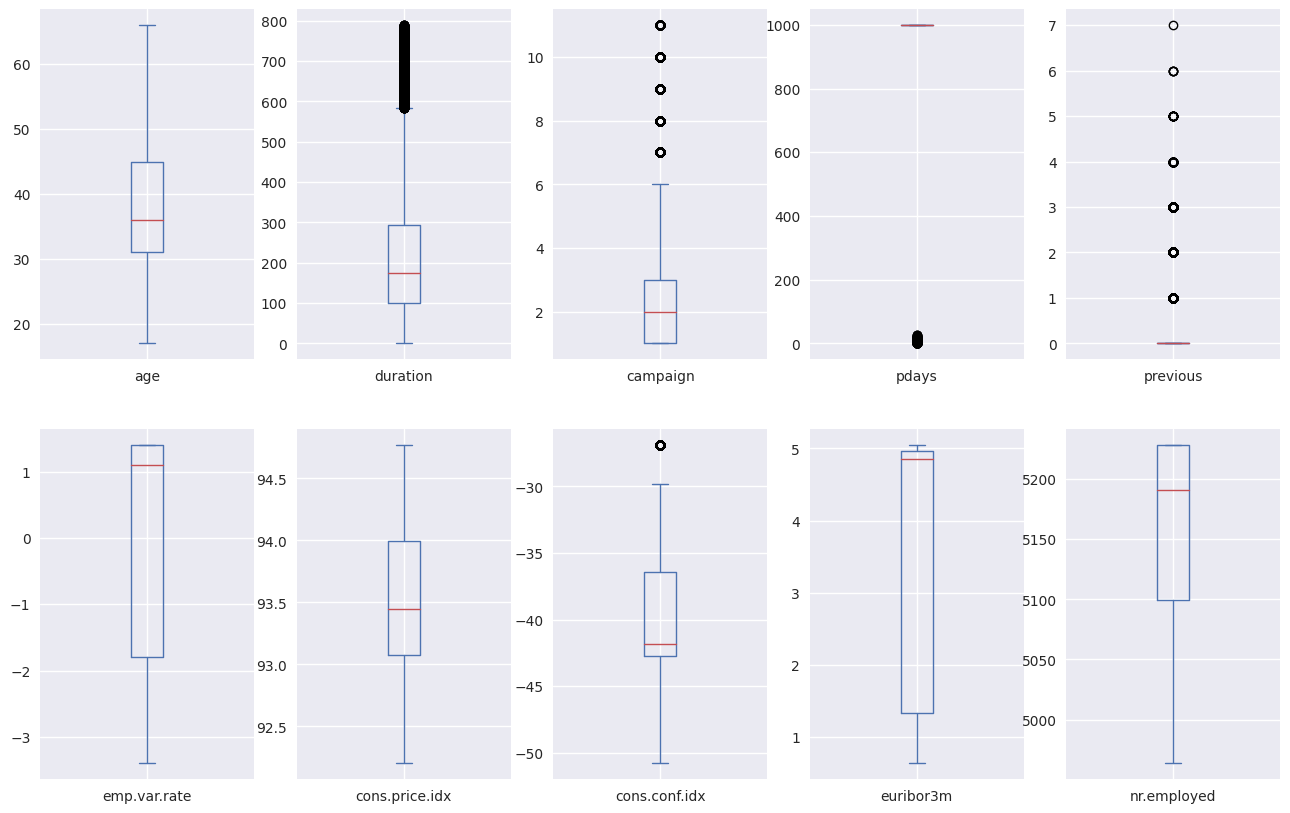

In [ ]:
clean_data.plot(kind="box", subplots=True, figsize=(16, 10), layout=(2, 5))

In [ ]:
clean_data.shape

(28232, 20)

### Univariate Analysis

In [ ]:
my_report = sv.analyze(clean_data)

                                             |          | [  0%]   00:00 -> (? left)


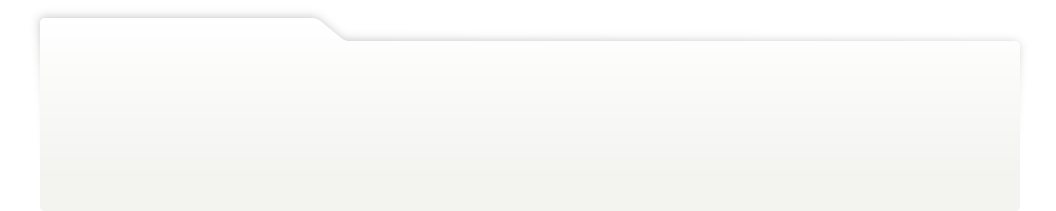
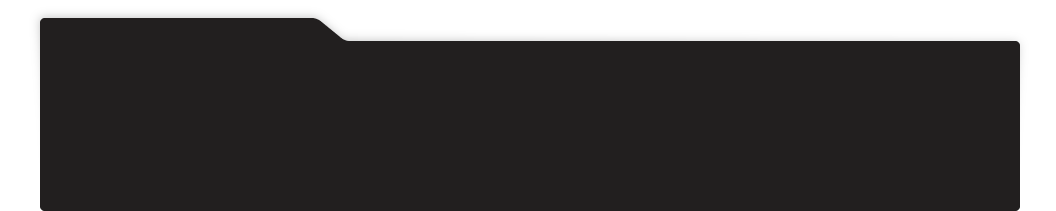
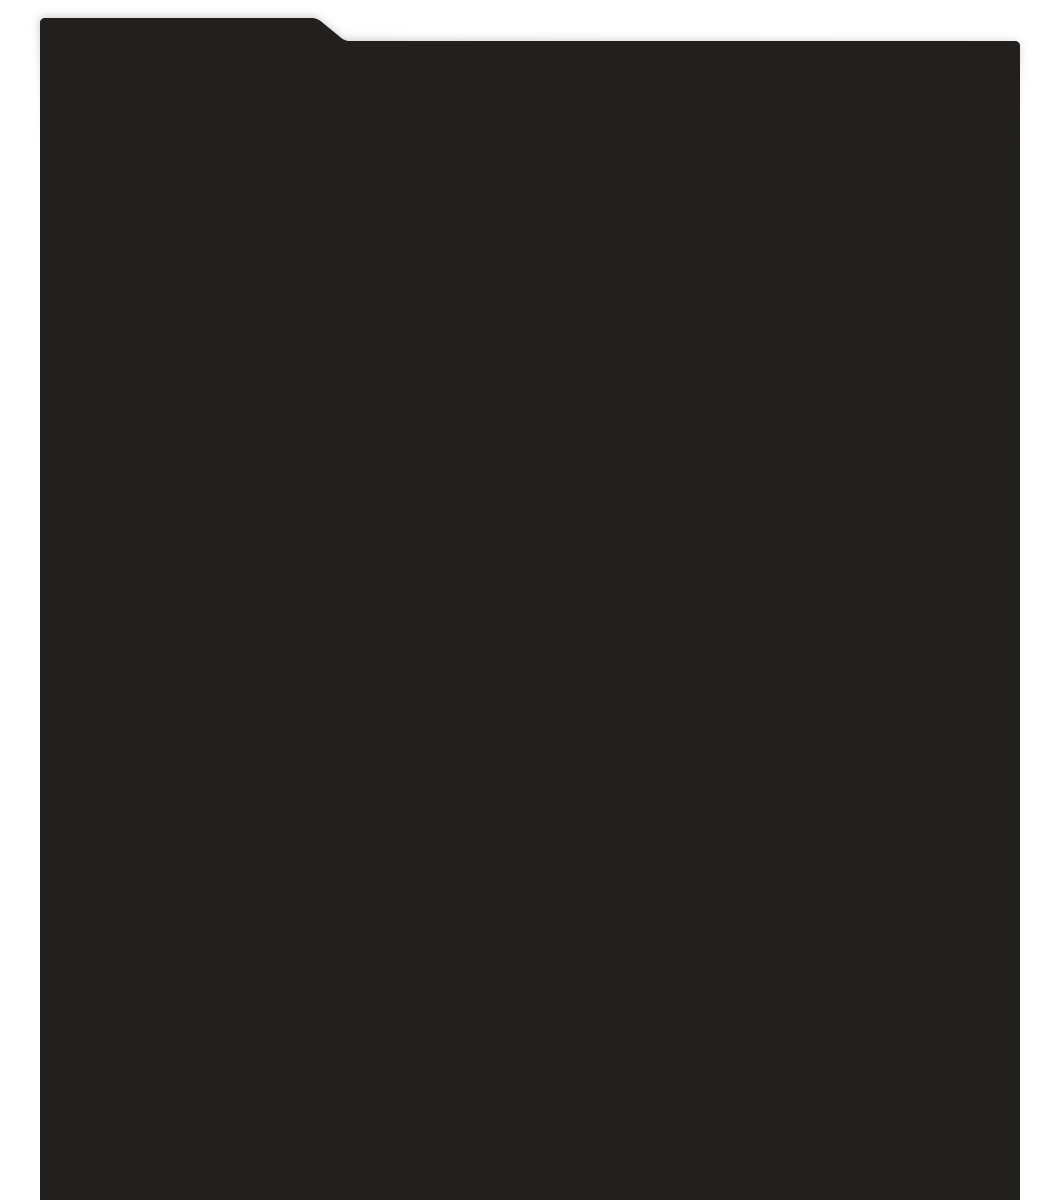
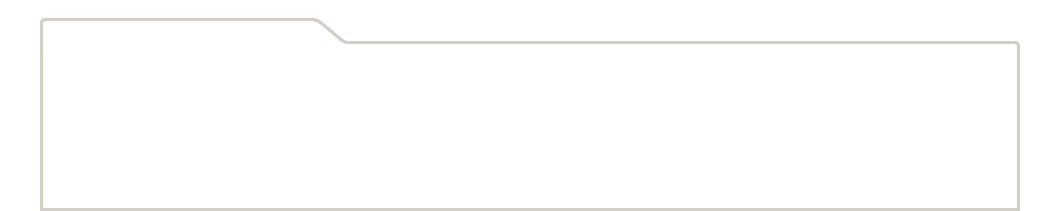
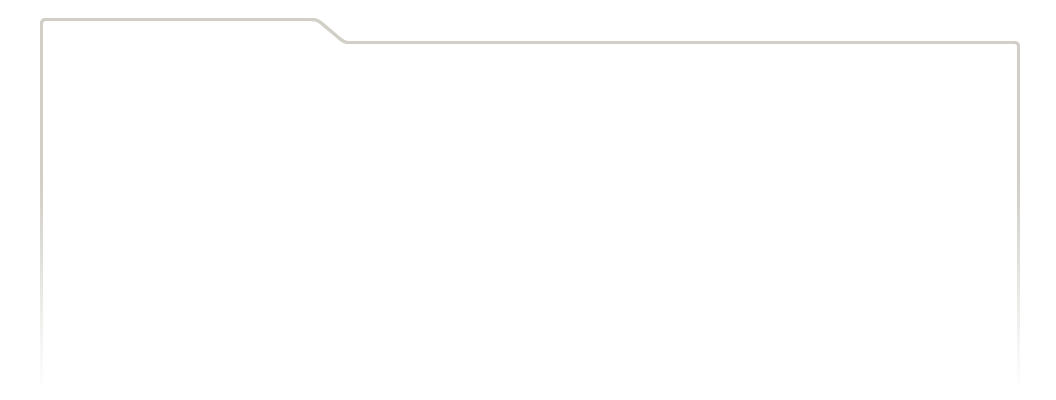
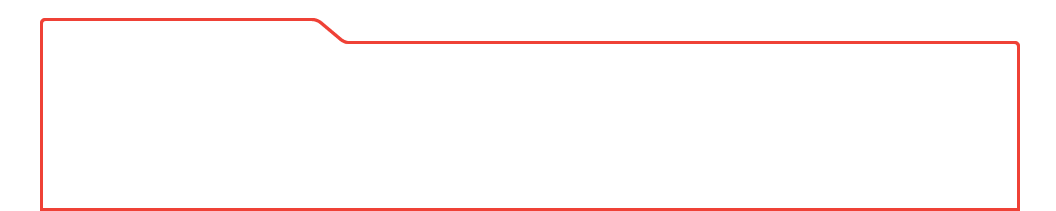
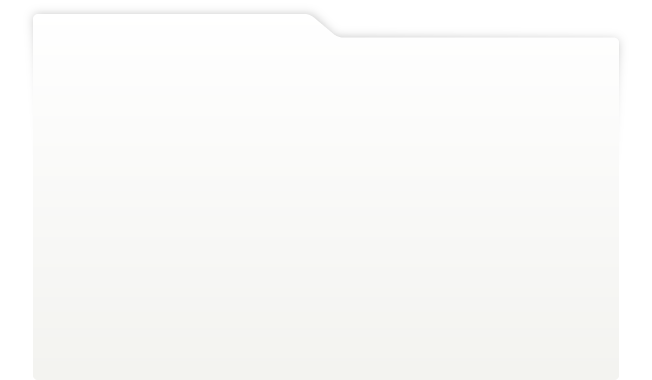
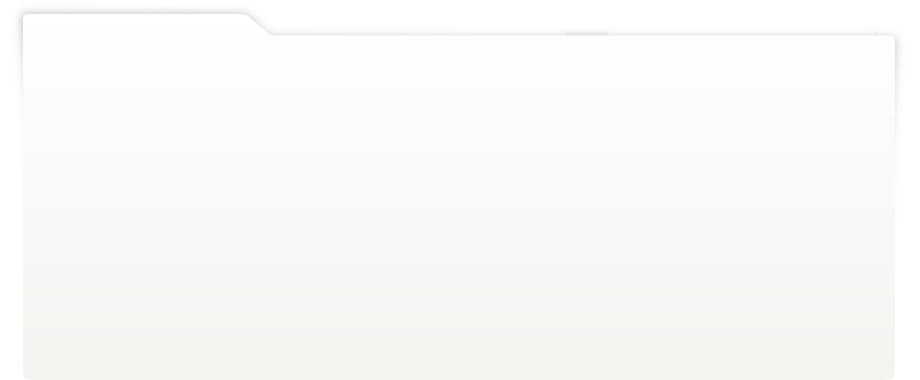
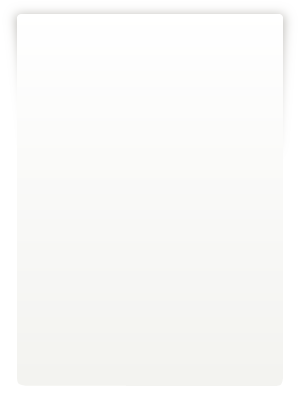
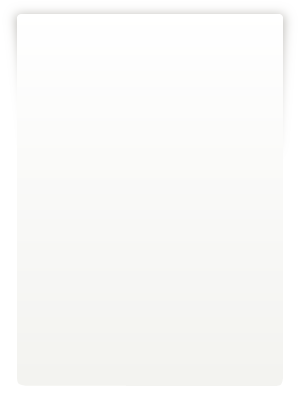
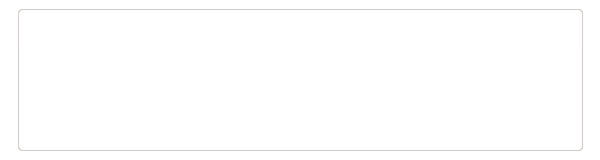
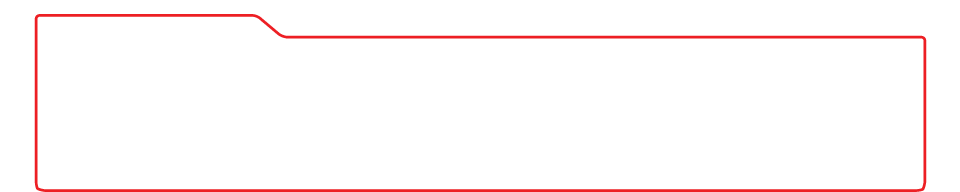
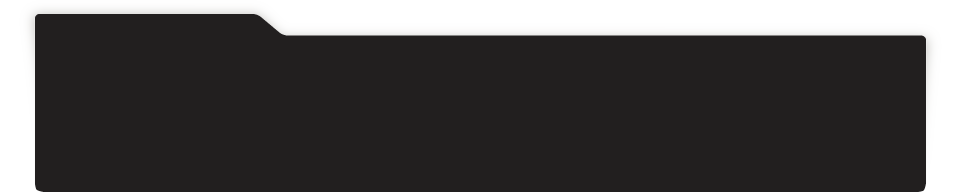
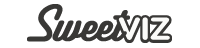
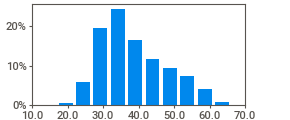
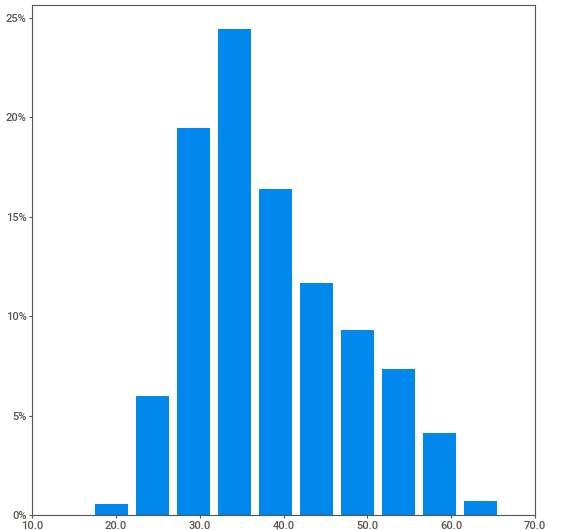
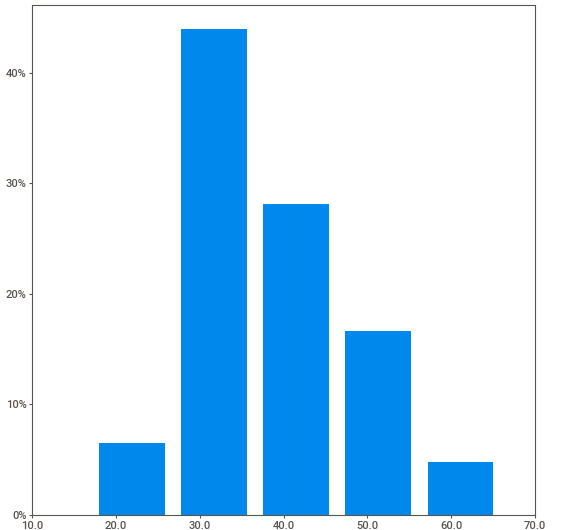
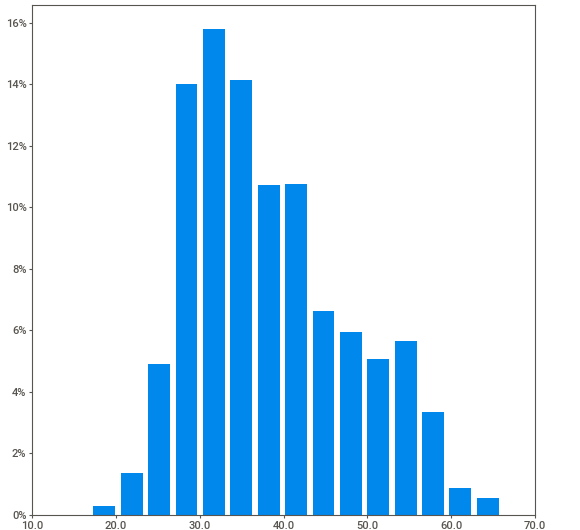
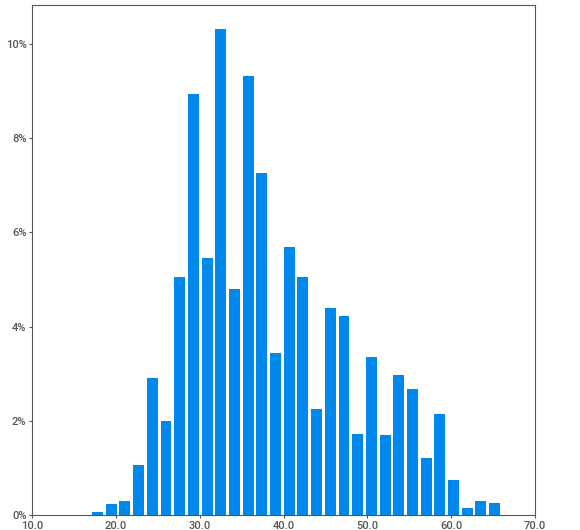
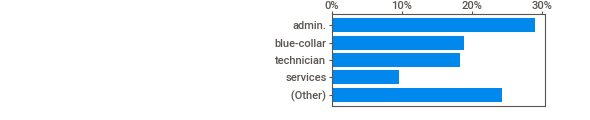
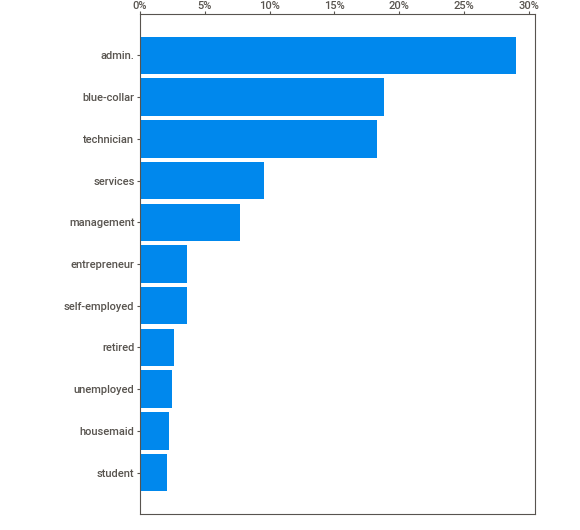
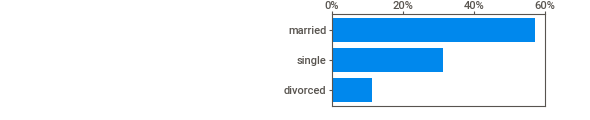
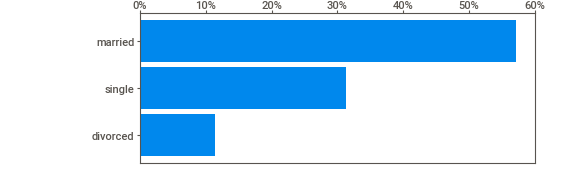
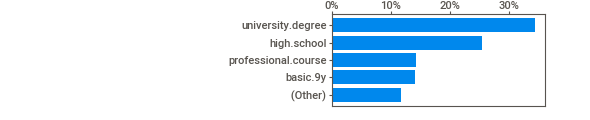
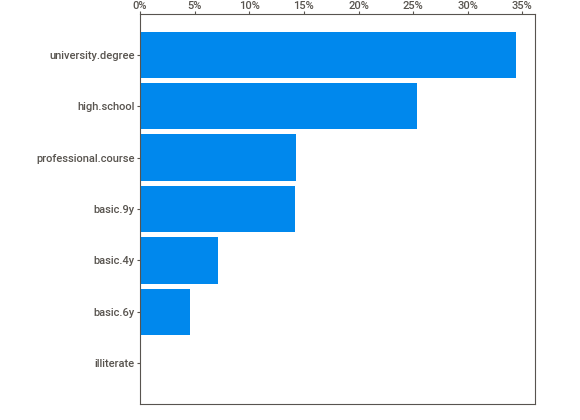
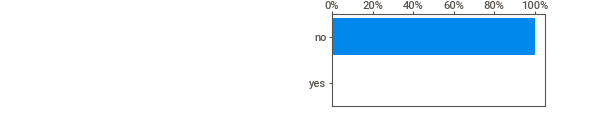
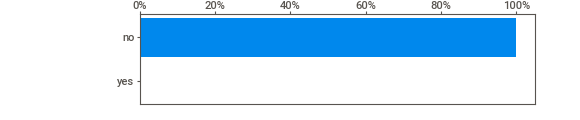
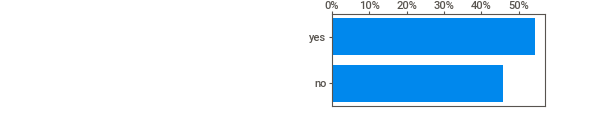
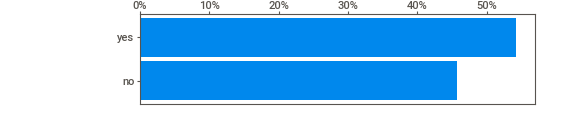
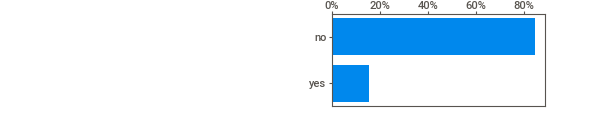
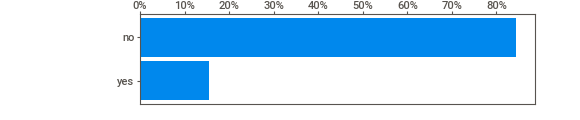
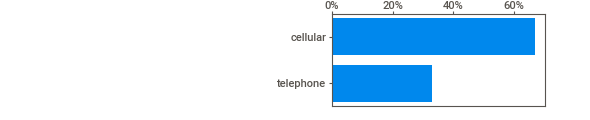
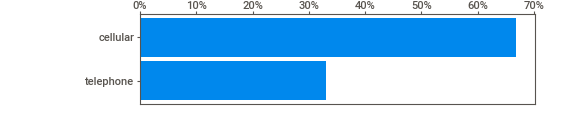
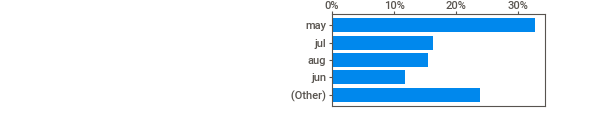
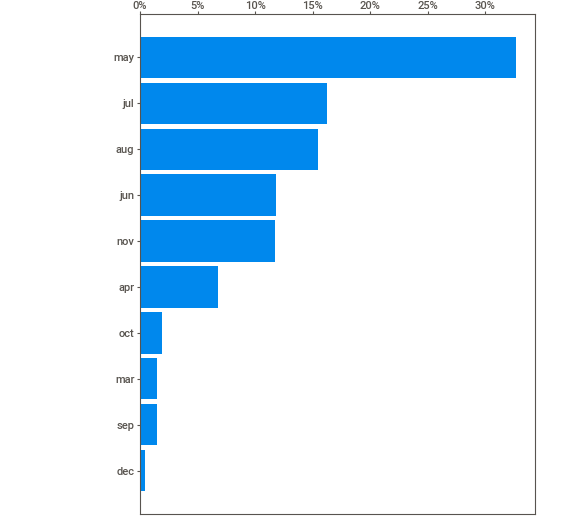
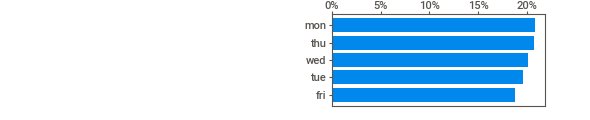
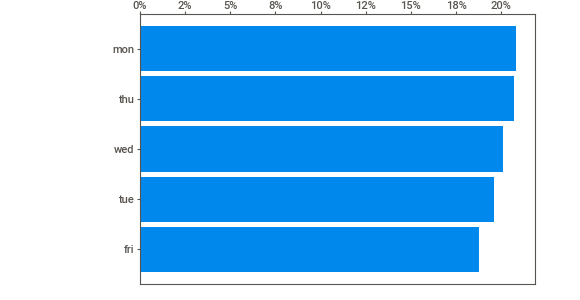
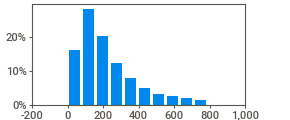
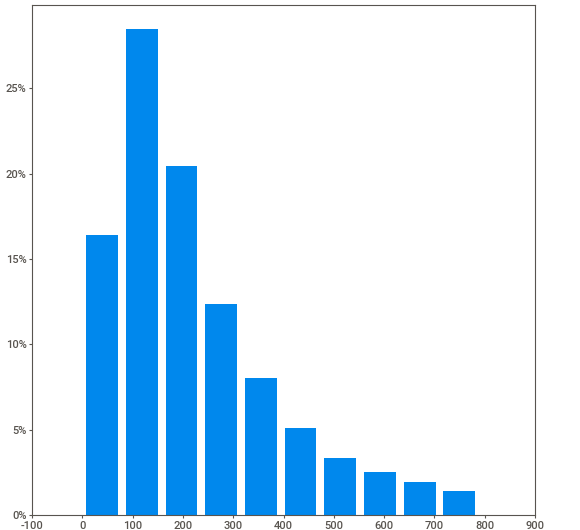
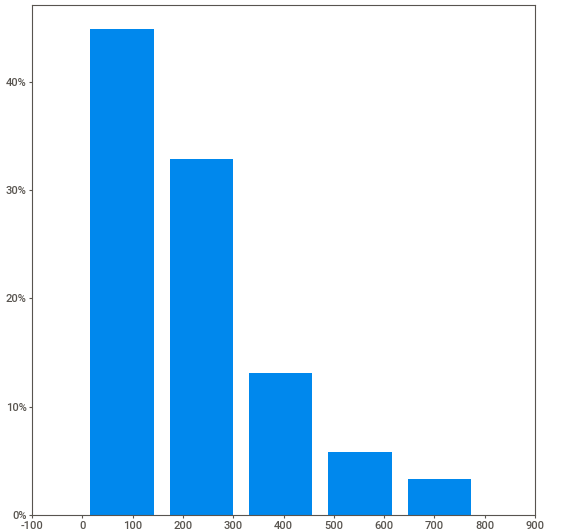
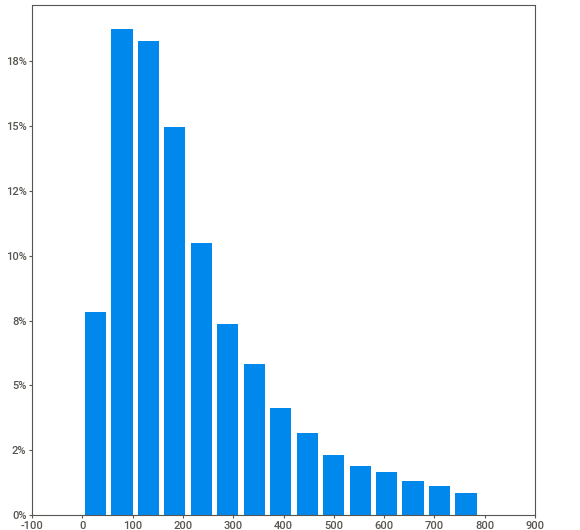
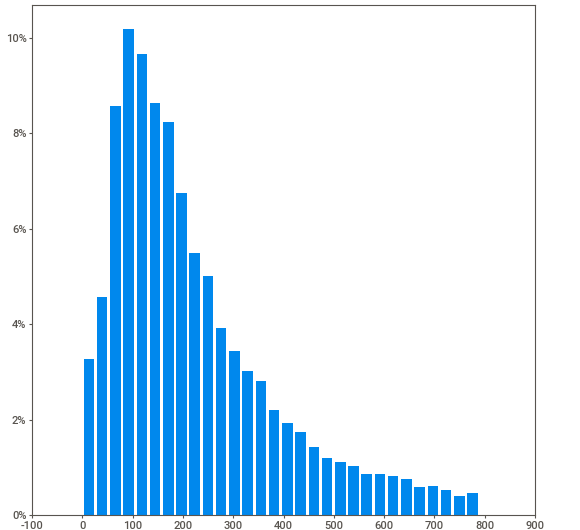
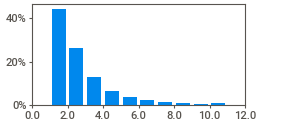
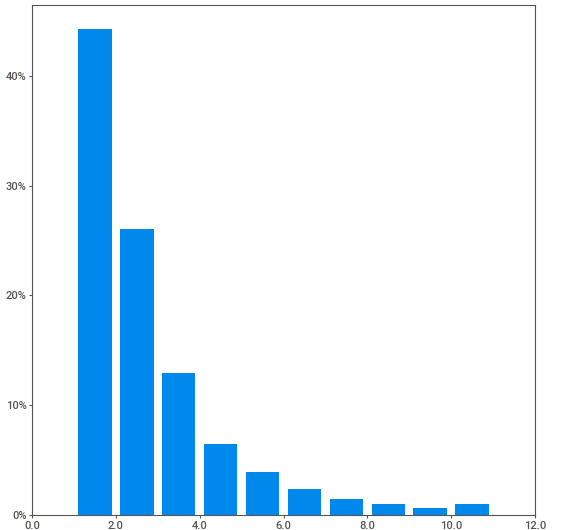
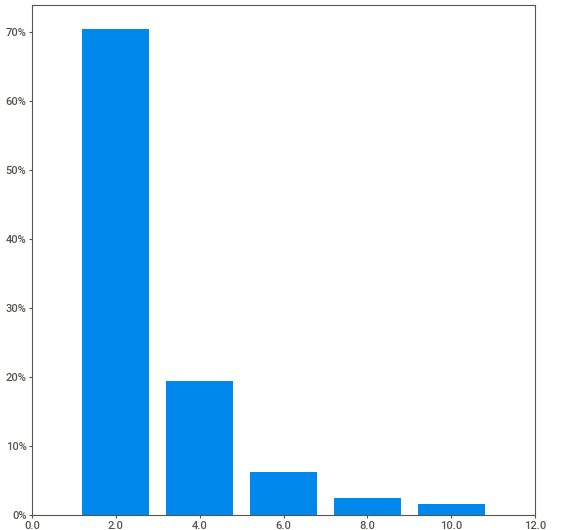
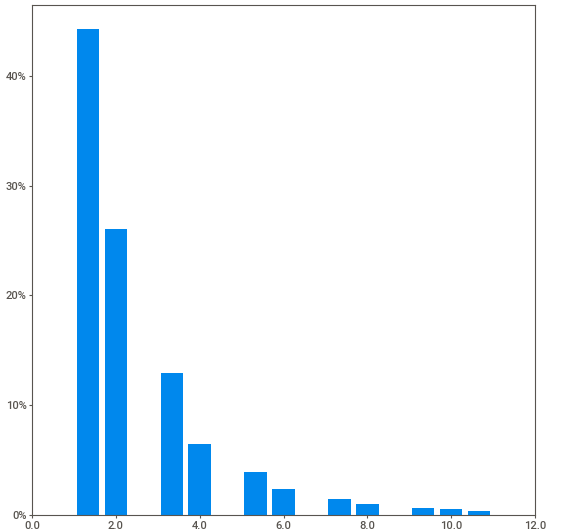
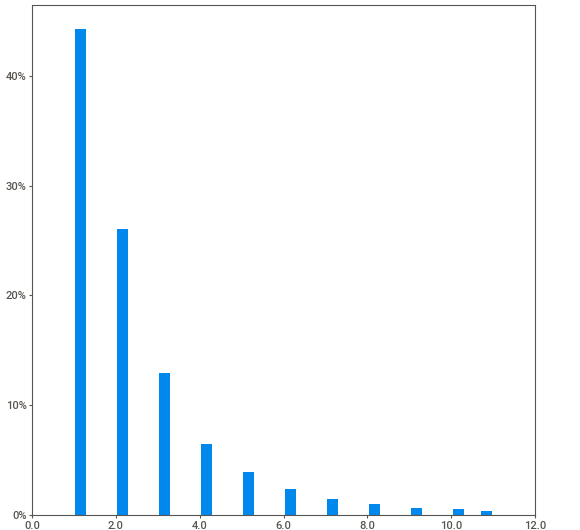
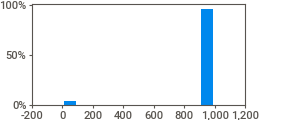
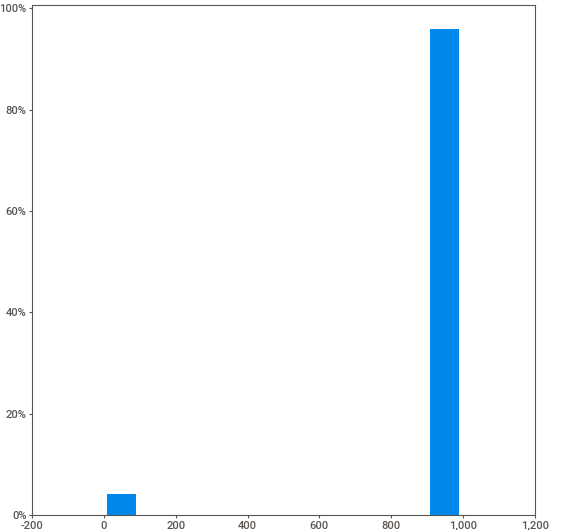
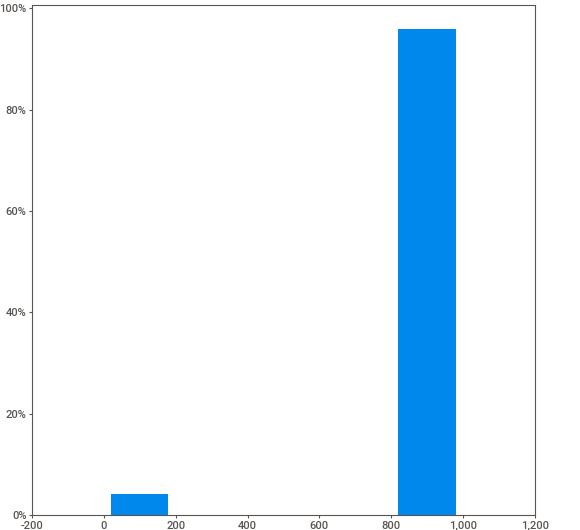
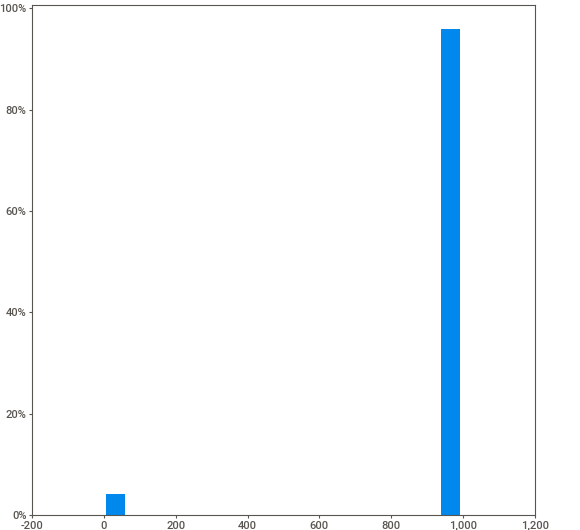
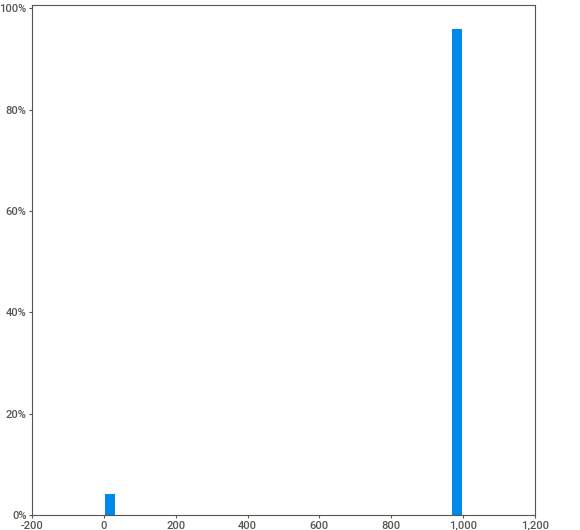
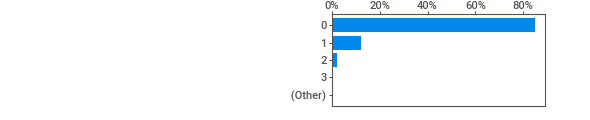
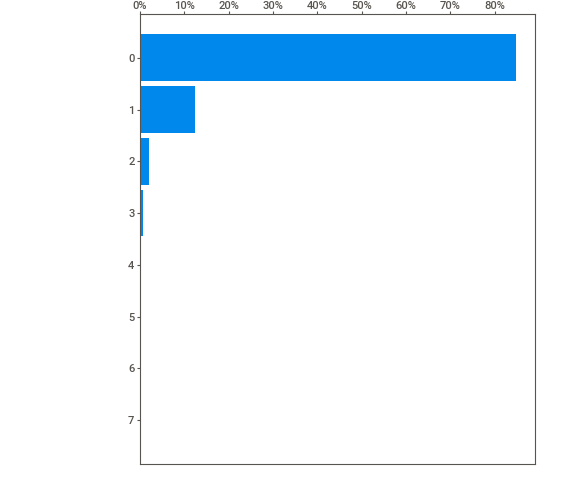
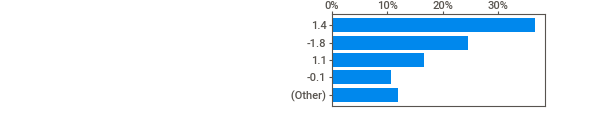
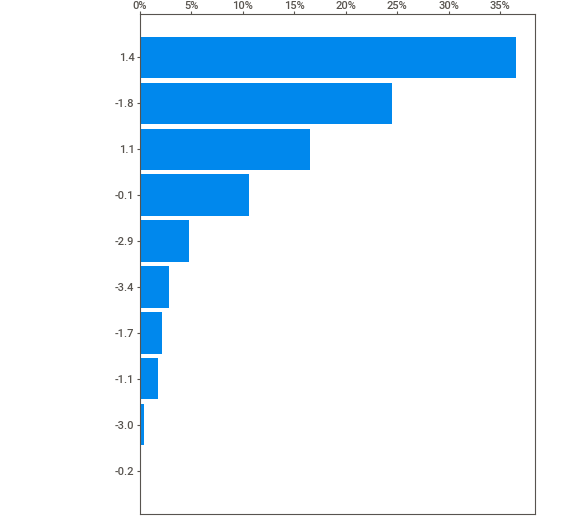
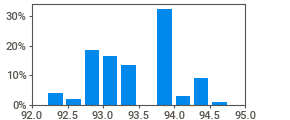
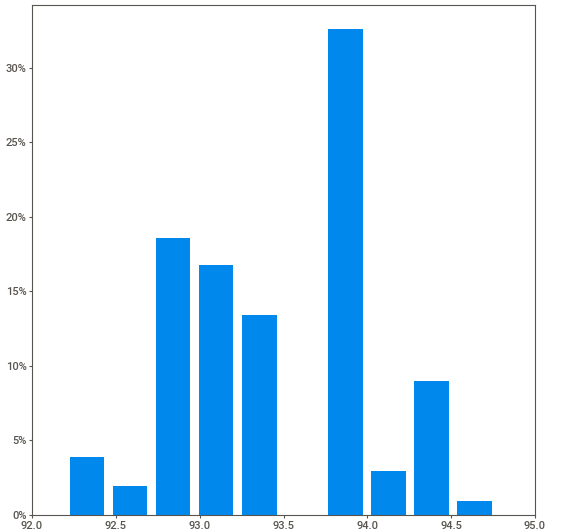
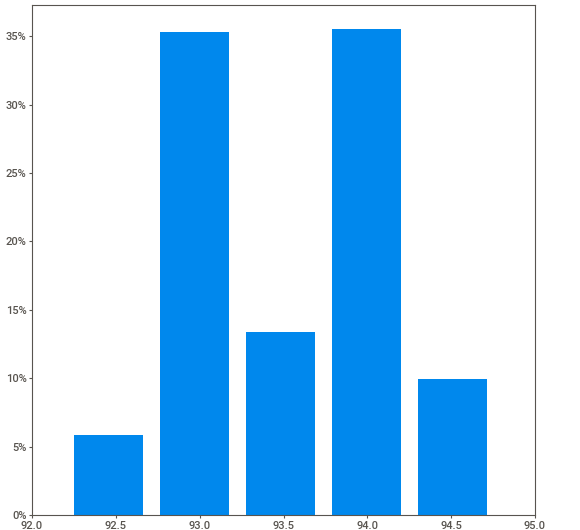
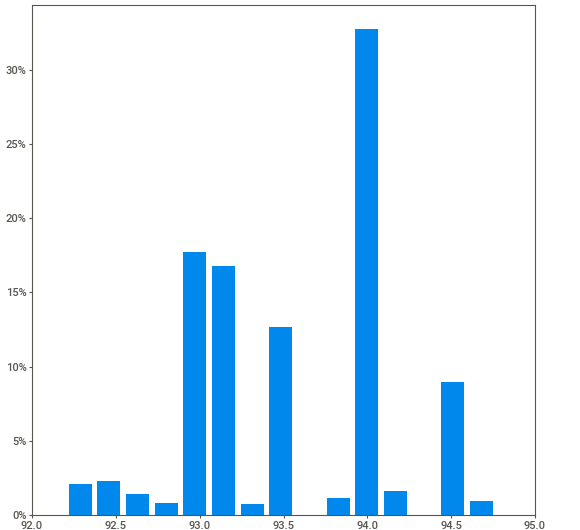
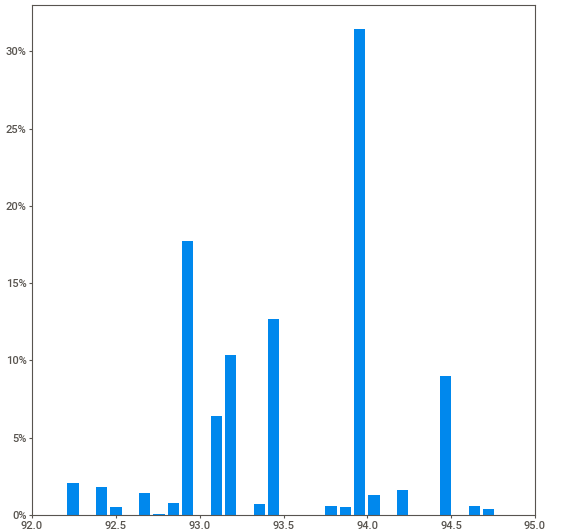
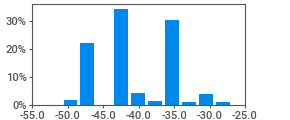
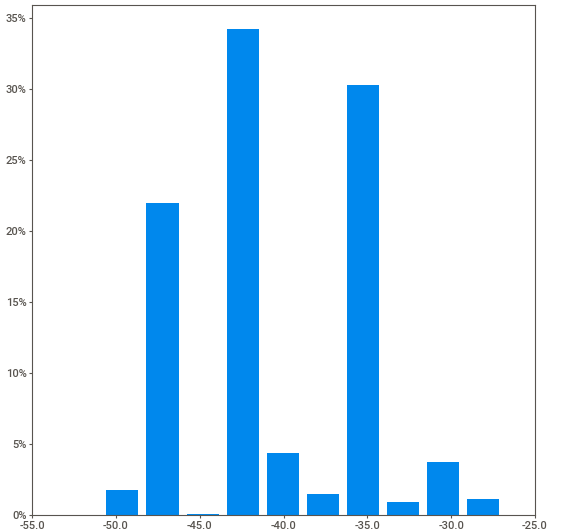
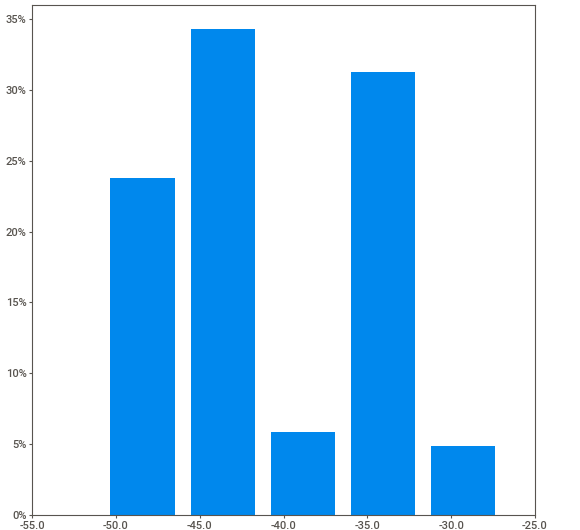
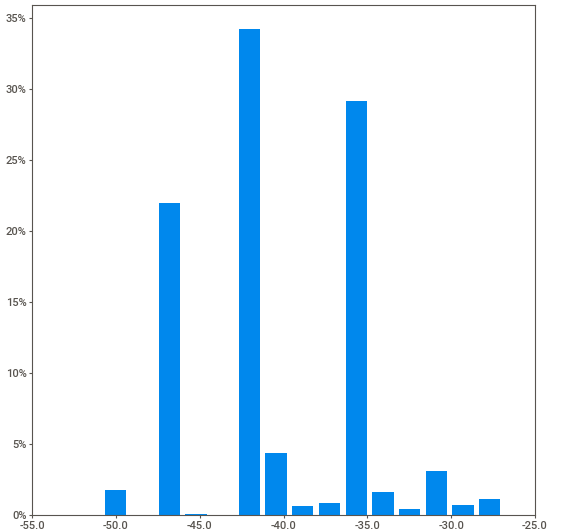
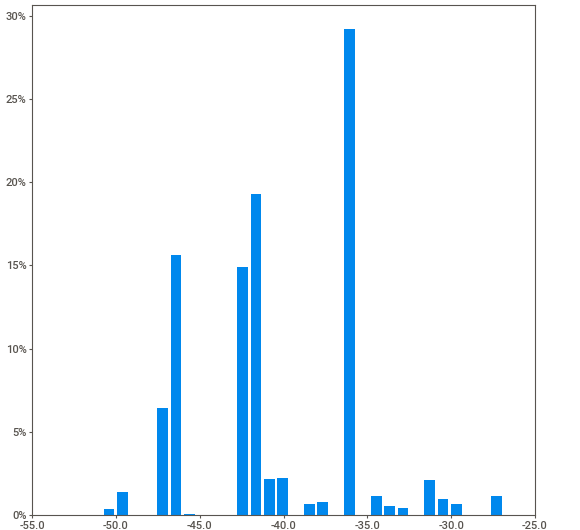
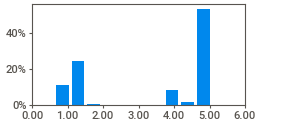
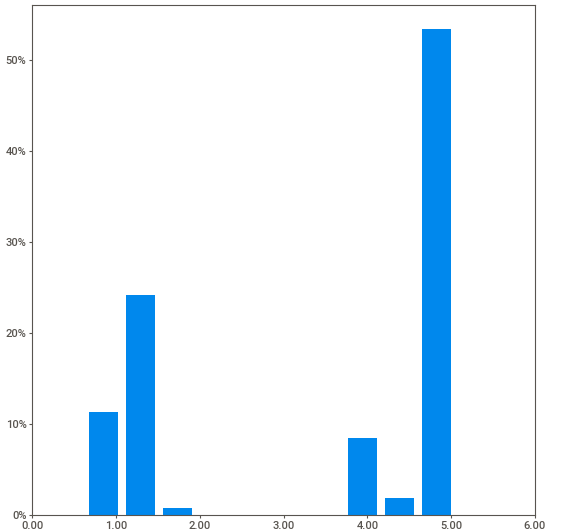
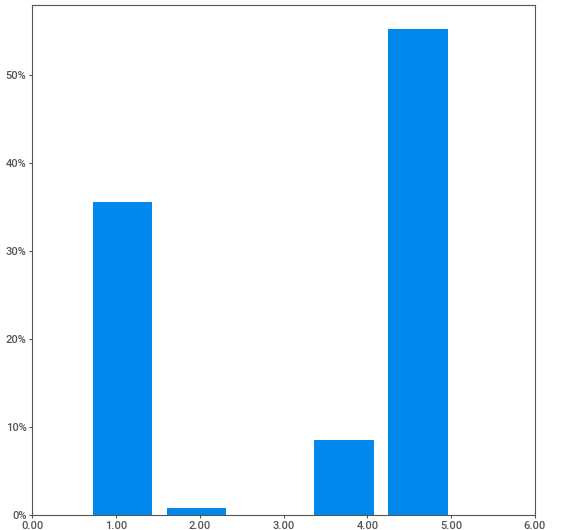
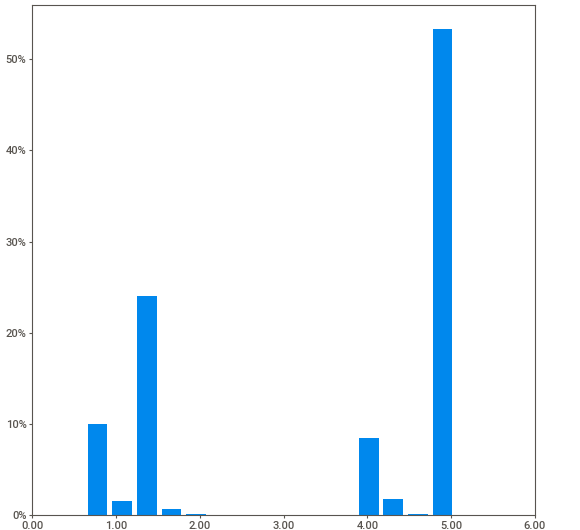
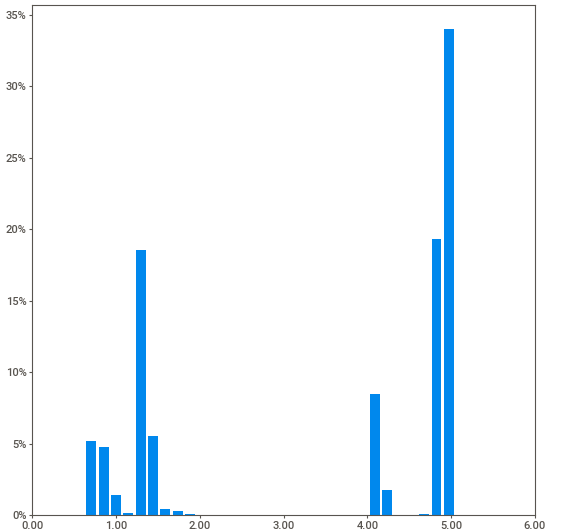
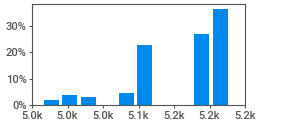
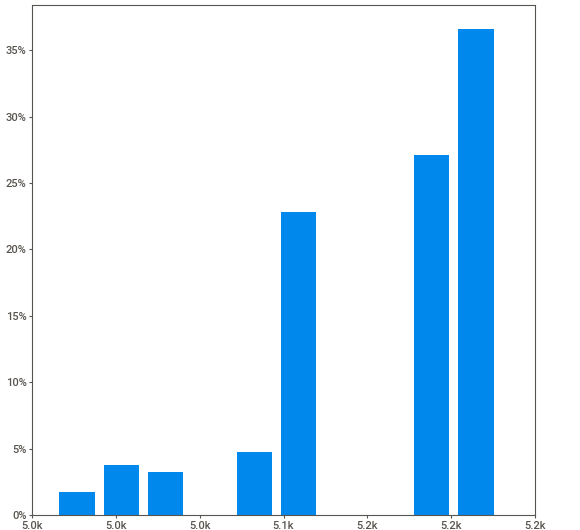
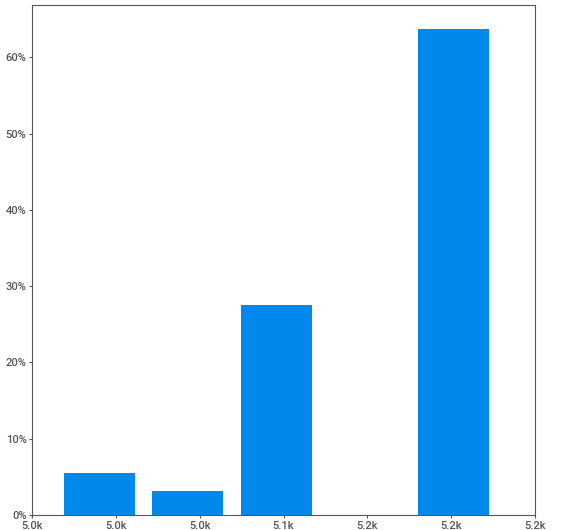
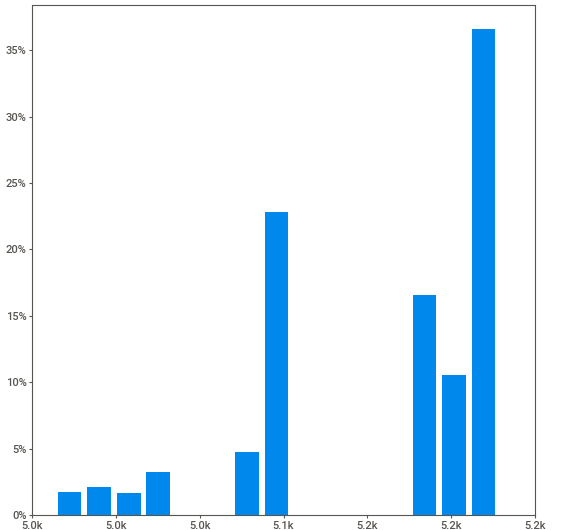
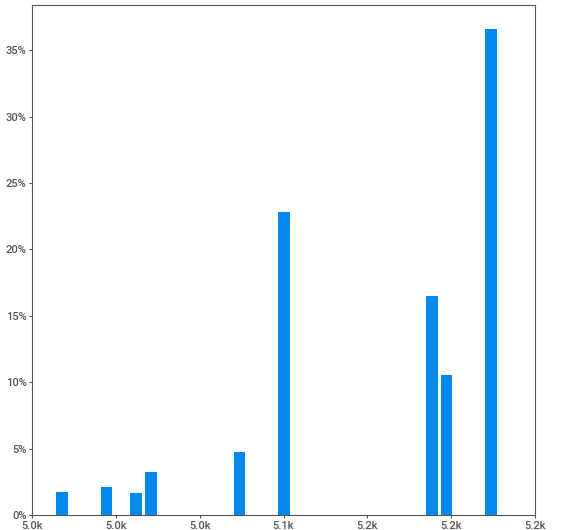
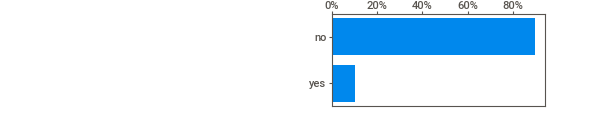
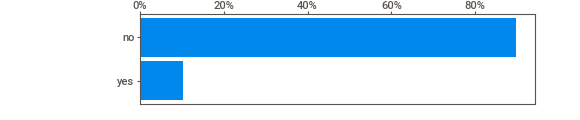
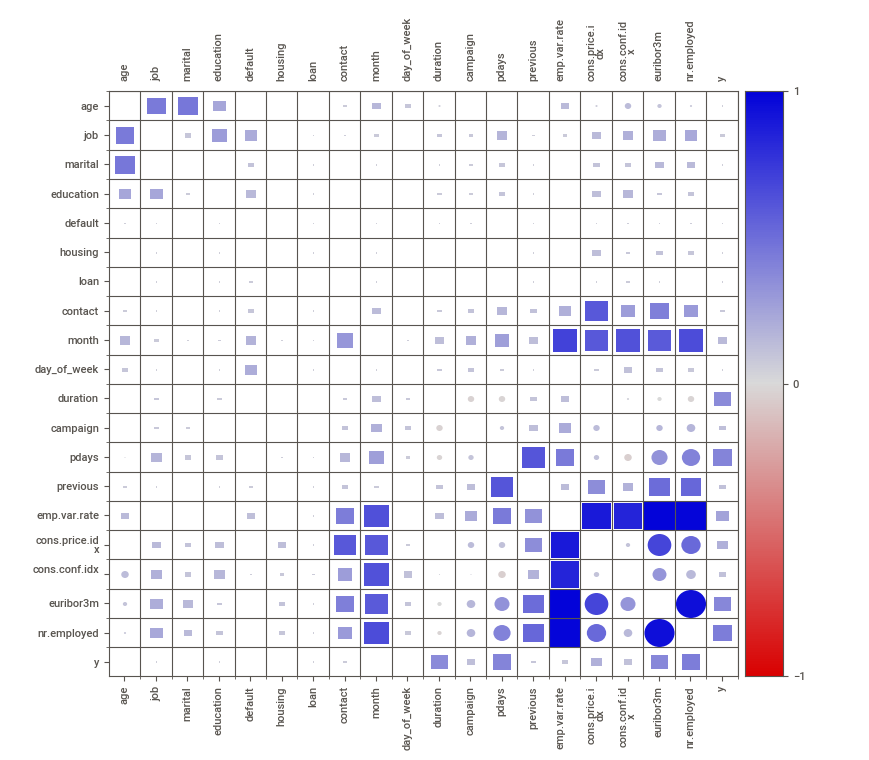
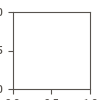

In [ ]:
my_report.show_notebook(layout='vertical')

#### Univariate Analysis Insights

- y or target variable 90% no and 10% yes. Target feature is imbalanced.

- Customer age ranges from 17 to 66 years, with an average age of 38.5 years.
- 29% of clients work administration jobs, 19% in blue-collar jobs and 18% in technician jobs.
- 57% of clients are married, 31% are single and remaining are divorced.
- 34% of clients highest level of education is university degree and 25% is high school.
- 99% of clients do not have credit in default.
- 54% of clients have housing.
- 84% of clients do not have a personal loan.
- 67% of clients were contacted by cellular and remaining by telephone.
- Customers were contacted on months between March and December. 32% of clients were last contacted in May.
- Clients were contacted on days between Monday and Friday. The data distribution is approximately uniform.
- Duration of contact ranges from 0 to 789 seconds, with an average of 220 seconds.
- Number of times client was contacted during this campaign ranges from 1 to 11. 44.2% of clients were contacted only one time.
- 95.9% of clients were not contacted in a previous campaign.
- 85% of clients were not contacted before this campaign.

Social and Economic context features
- 37% of clients have an employment variation rate of 1.4

- Consumer price index ranges from 92.2 to 94.77, with an average of 93.52.
- Consumer confidence index ranges from -50.8 to -26.9, with an average of -40.7.
- Euribor 3 month rate ranged from 0.63 to 5.04, with an average of 3.48.
- Number of employees ranges from 4964 to 5228, with an average of 5161.


### Bivariate Analysis

In [ ]:
bivar_df = clean_data.copy()

In [ ]:
bivar_df.shape

(28232, 20)

#### Target Variable

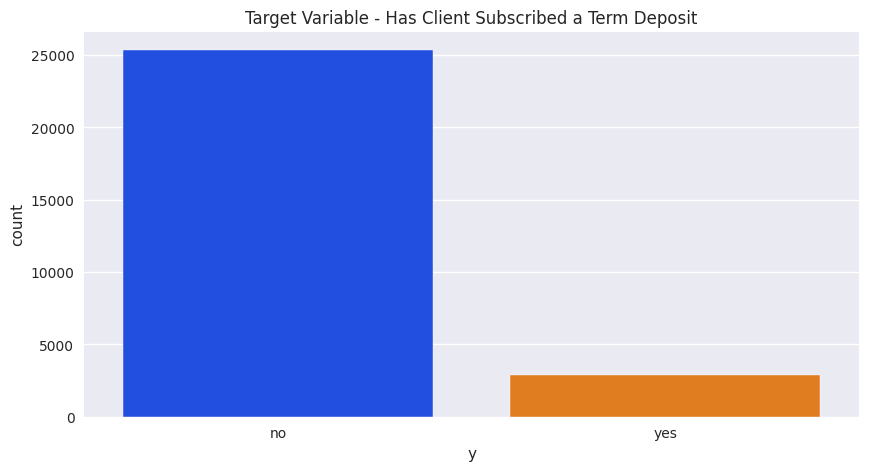

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='y', hue='y', palette='bright').set_title('Target Variable - Has Client Subscribed a Term Deposit')
plt.show()

- The target variable is considerably imbalanced.
- Before the prediction models are trained, Synthetic Minority Oversampling Technique (SMOTE) will be used to balance the data for better prediction results.

#### Categorical Variables

##### Job Type

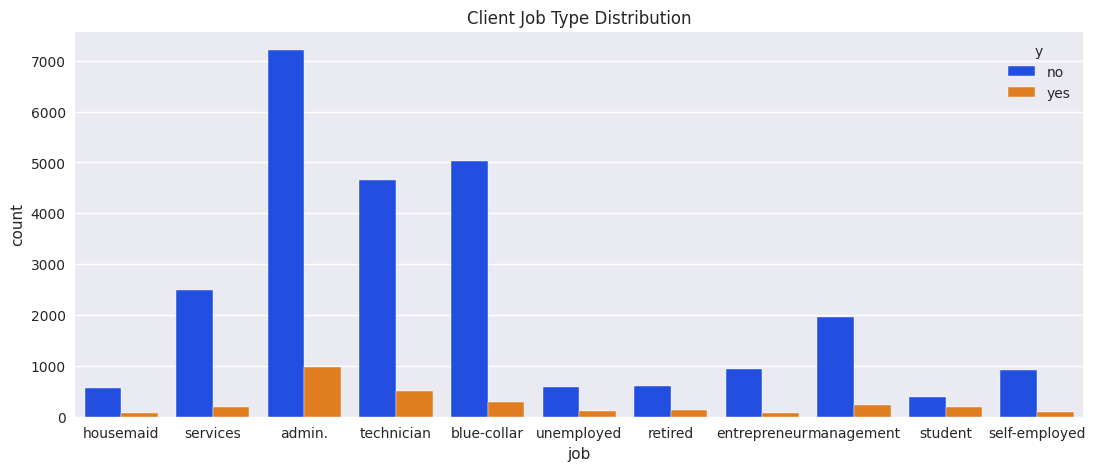

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(bivar_df, x='job', hue='y', palette='bright').set_title('Client Job Type Distribution')
plt.show()

- Majority of the clients contacted have a job in administration, technician or blue-collar.
- The bank market team could consider contacting more people in these jobs to increase term deposit subscriptions.

##### Marital Status

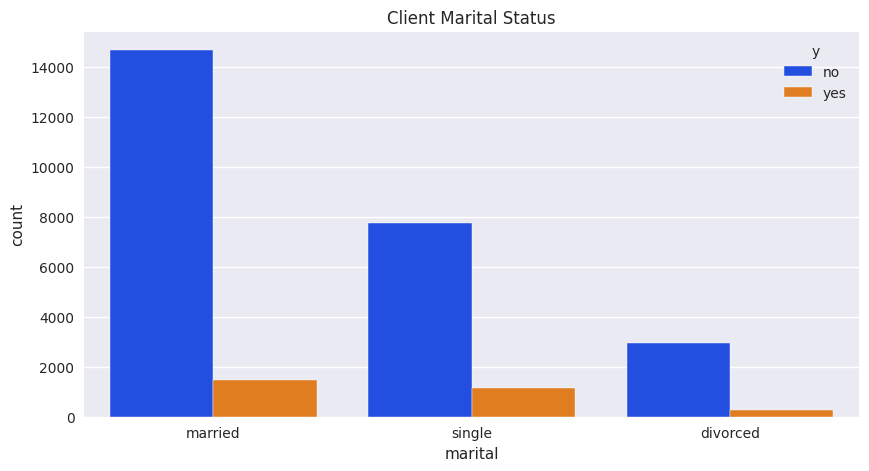

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='marital', hue='y', palette='bright').set_title('Client Marital Status')
plt.show()

- Majority of clients in the data are married.

##### Education Level

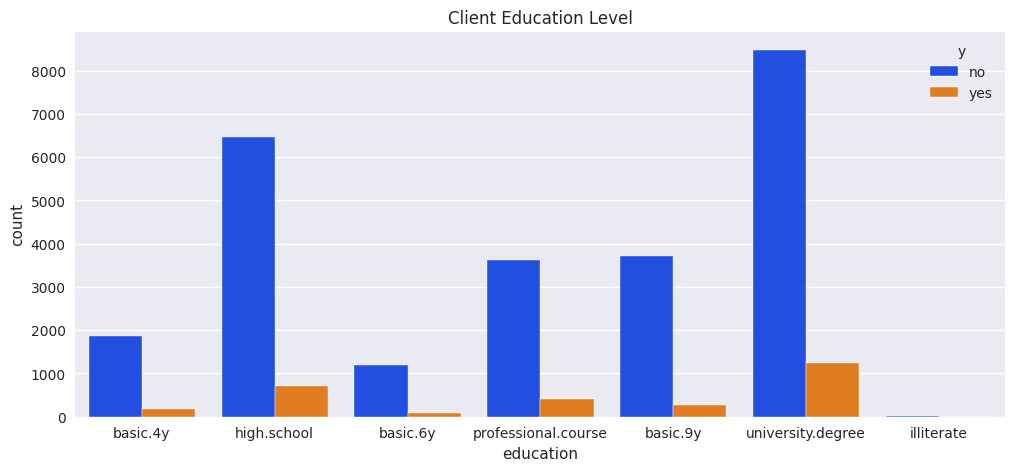

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(bivar_df, x='education', hue='y', palette='bright').set_title('Client Education Level')
plt.show()

- Majority of clients that subscribed to term deposit have an aducation level of university degree, high school or professional course.
- Bank market team could consider contacting clients with an education level high school, professional course or university degree to increase term deposit subscriptions.

##### Default status

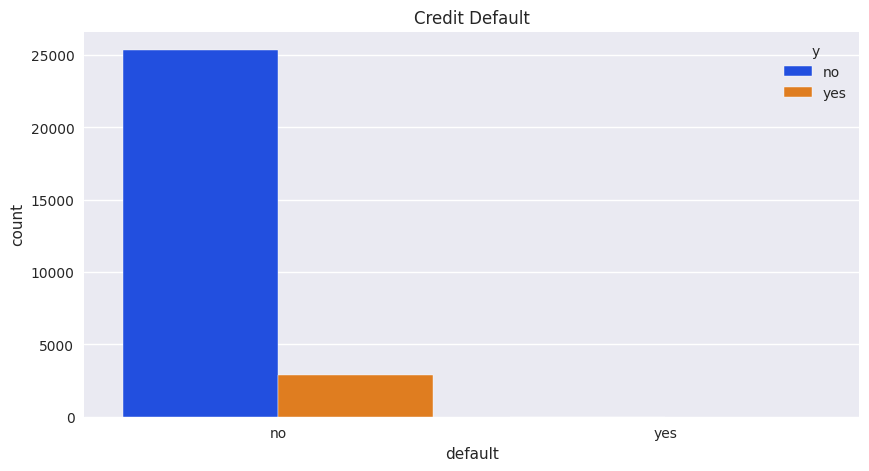

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='default', hue='y', palette='bright').set_title('Credit Default')
plt.show()

- Almost all clients in the data do not have credit in default.

##### Housing Loan

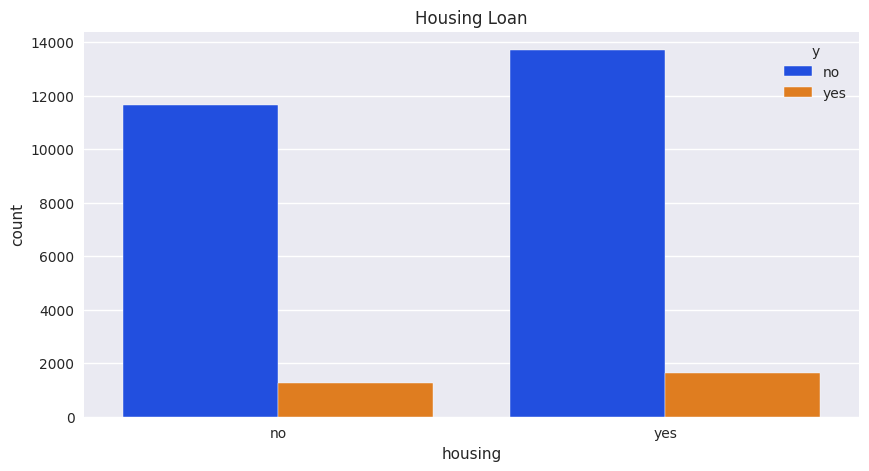

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='housing', hue='y', palette='bright').set_title('Housing Loan')
plt.show()

- Almost an equal number of clients subscribed to a term deposit whether they had a housing loan or not.

##### Personal Loan

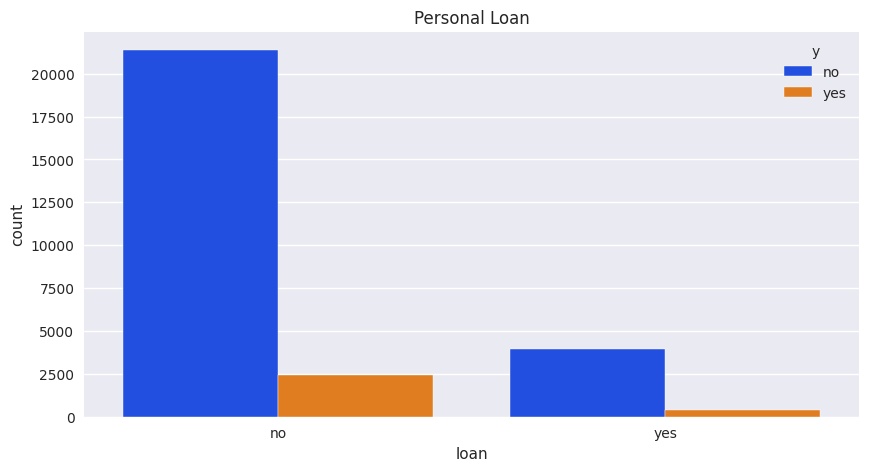

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='loan', hue='y', palette='bright').set_title('Personal Loan')
plt.show()

- Majority of clients that subscribed to a term deposit did not have a personal loan.
- Bank market team could consider contacting more clients that do not have personal loans to increase subsrciptions.

##### Contact Type

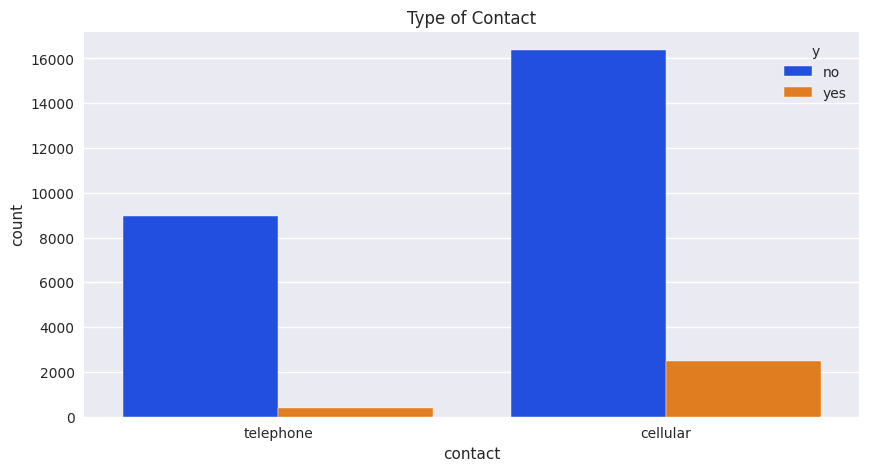

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='contact', hue='y', palette='bright').set_title('Type of Contact')
plt.show()

- Majority of clients that subscribed to a term deposit were contacted through cellular.
- Bank market team could consider increasing client contact through cellular.

##### Contact month

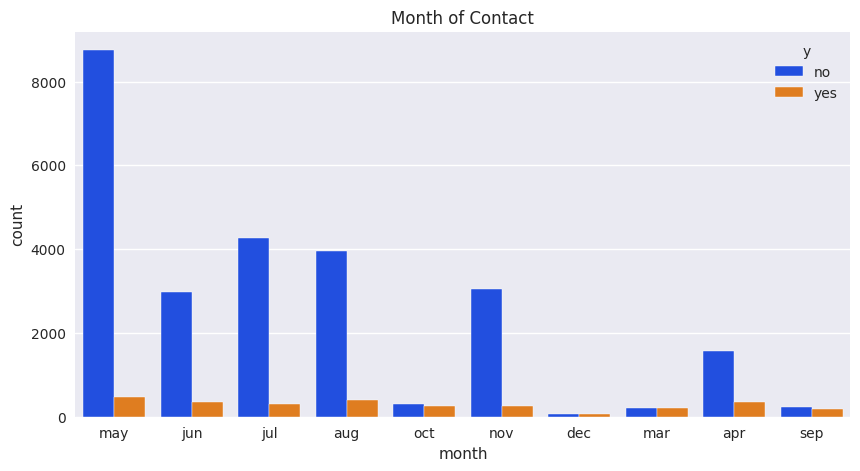

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='month', hue='y', palette='bright').set_title('Month of Contact')
plt.show()

##### Contact day

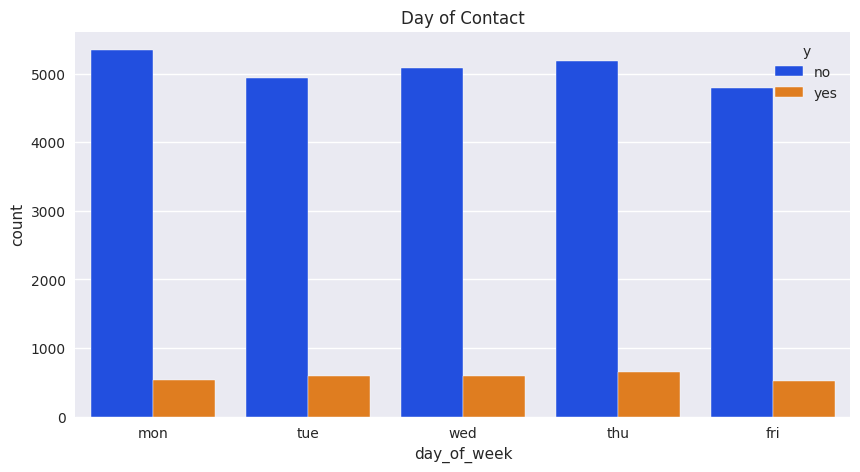

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='day_of_week', hue='y', palette='bright').set_title('Day of Contact')
plt.show()

- Distribution of clients for day of contact is approximately uniform.

#### Numeric Variables

##### Client Age

<Figure size 1200x500 with 0 Axes>

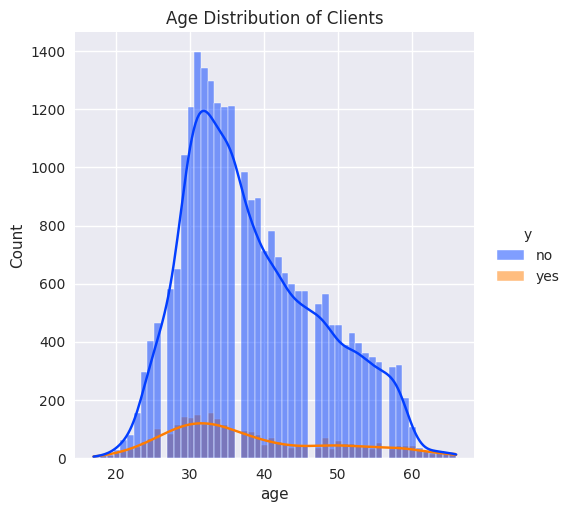

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(bivar_df, x='age', hue='y', palette='bright', kde=True)
plt.title('Age Distribution of Clients')
plt.show()

- Distribution of client age is slightly positively skewed.
- Log-transformation will be used to scale the data before training models.
- Majority of clients that subscribed to term deposit appear to be in the age range of 25 to 40.
- Bank market team could consider contacting more clients with ages between 25 to 40 to increase term deposit subscriptions.

##### Client Contact Duration

<Figure size 1200x500 with 0 Axes>

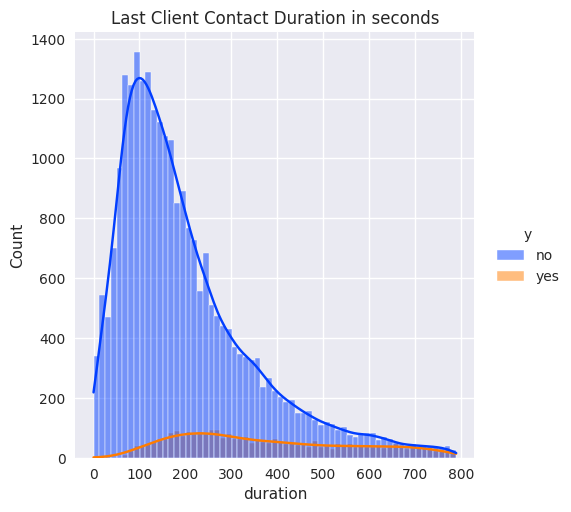

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(bivar_df, x='duration', hue='y', palette='bright', kde=True)
plt.title('Last Client Contact Duration in seconds')
plt.show()

- Distribution of client contact duration is highly positively skewed.
- Log-transformation will be used to scale the data before training models.
- Majority of clients that subscribed to term deposit appear to have a contact duration of 100 to 400 seconds or approximately 1 to 7 minutes.
- Bank market team could consider contacting clients and keeping the duration of contact between 1 to 7 minutes.

##### Number of Contacts During the Campaign

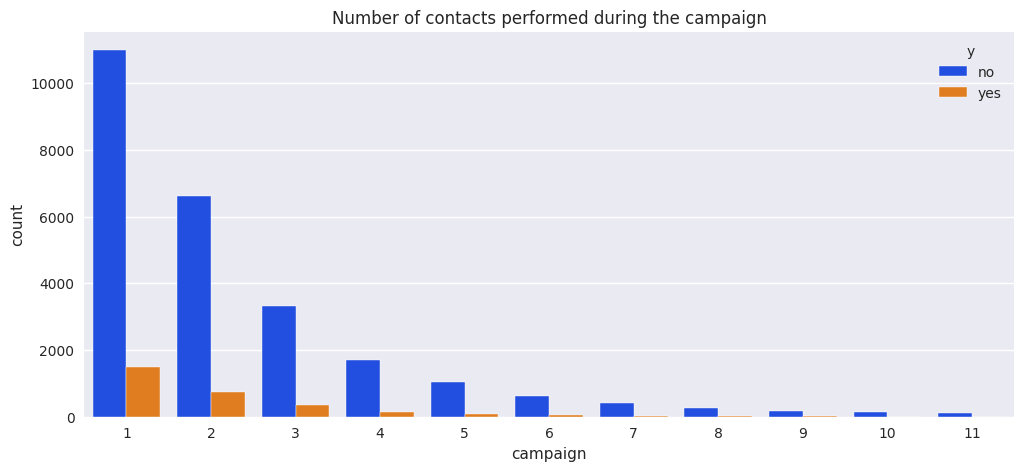

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(bivar_df, x='campaign', hue='y', palette='bright')
plt.title('Number of contacts performed during the campaign')
plt.show()

#### Social and Economic Variables

##### Employment Variation Rate

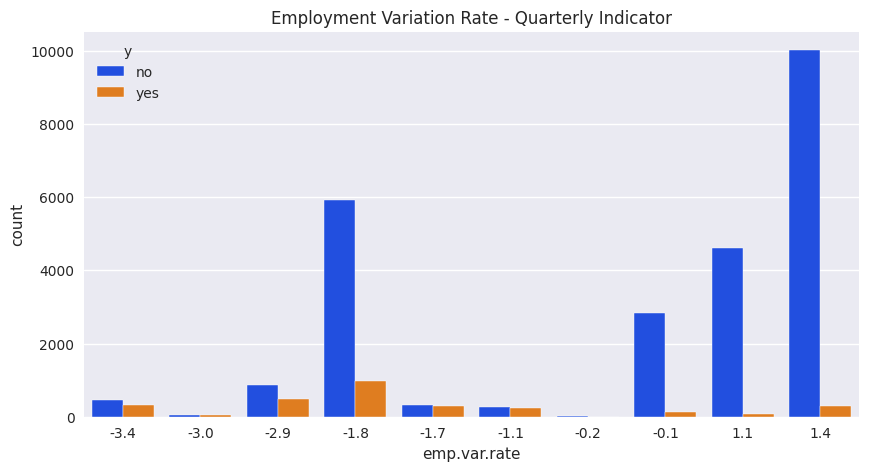

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(bivar_df, x='emp.var.rate', hue='y', palette='bright')
plt.title('Employment Variation Rate - Quarterly Indicator')
plt.show()

##### Consumer Price Index

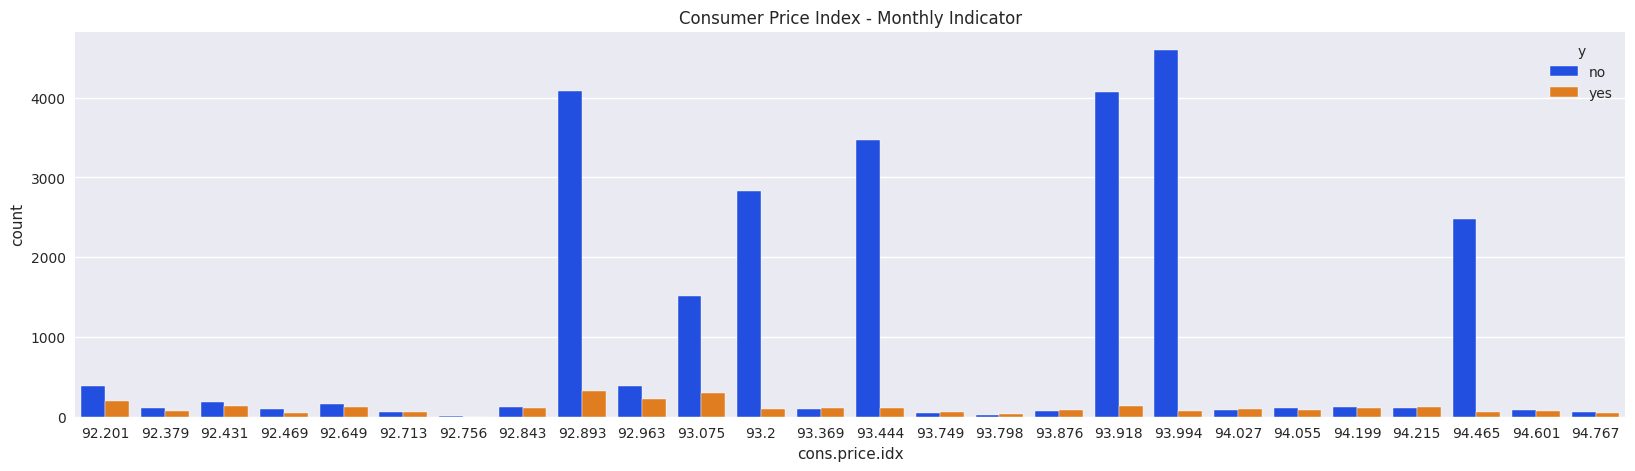

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(bivar_df, x='cons.price.idx', hue='y', palette='bright').set_title('Consumer Price Index - Monthly Indicator')
plt.show()

##### Consumer Confidence Index

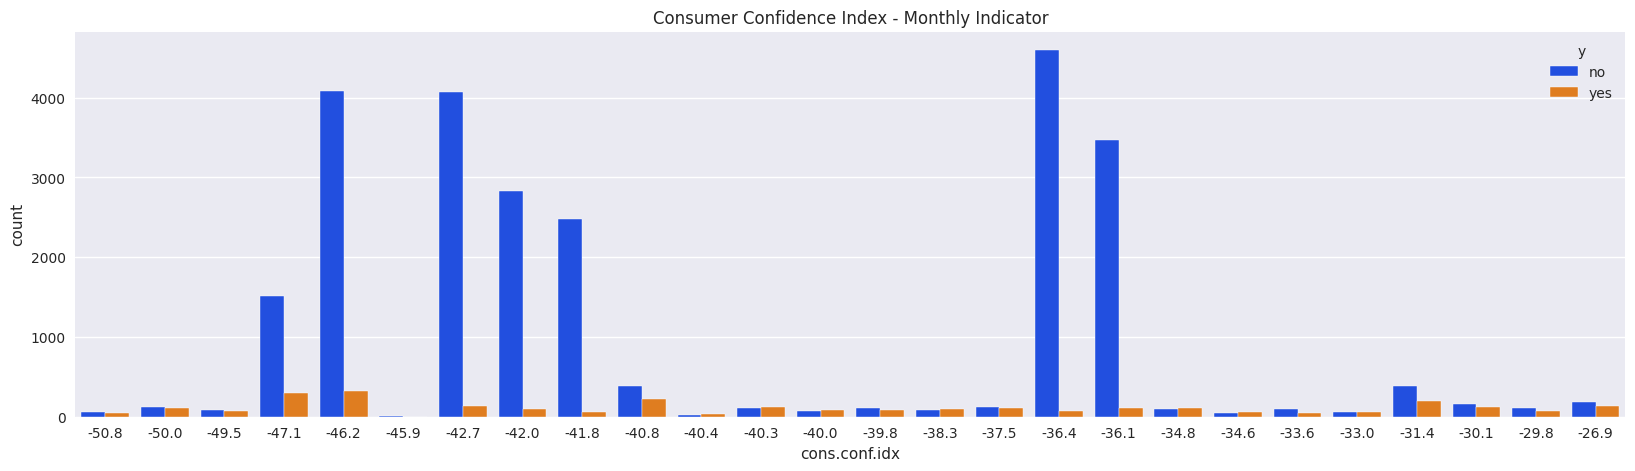

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(bivar_df, x='cons.conf.idx', hue='y', palette='bright').set_title('Consumer Confidence Index - Monthly Indicator')
plt.show()

##### Number of Employees

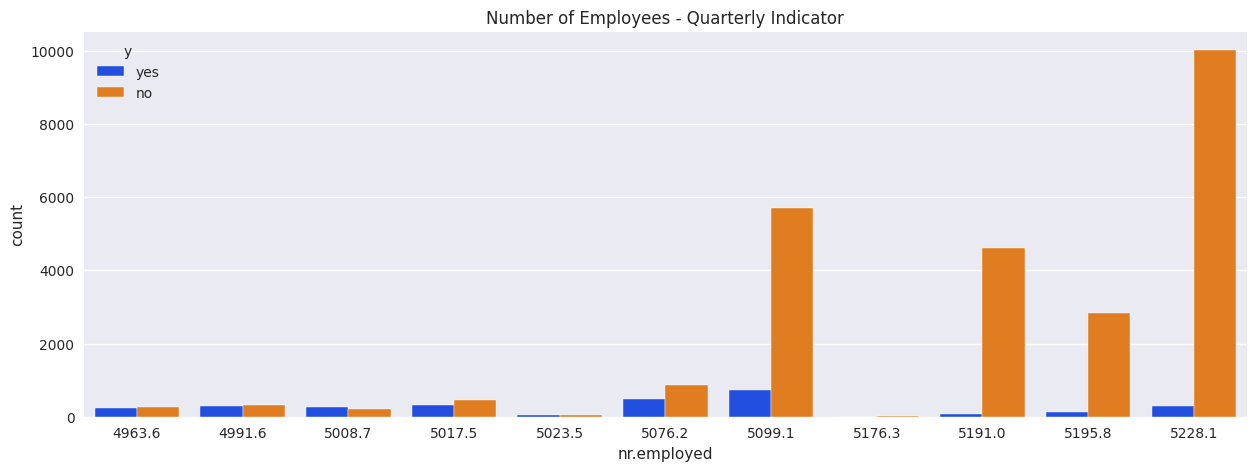

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(bivar_df, x='nr.employed', hue='y', palette='bright').set_title('Number of Employees - Quarterly Indicator')
plt.show()

## Data Preparation

In [ ]:
encoded_data = bivar_df.copy()

In [ ]:
encoded_data.shape

(28232, 20)

### Data Encoding

- Data in string format is encoded into numeric before further analysis.

In [ ]:
for col in encoded_data.columns:
  if str(encoded_data.dtypes[col]) == 'object':
    print(f'{col} unique values: {encoded_data[col].unique()}')
    print()

job unique values: ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']

marital unique values: ['married' 'single' 'divorced']

education unique values: ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']

default unique values: ['no' 'yes']

housing unique values: ['no' 'yes']

loan unique values: ['no' 'yes']

contact unique values: ['telephone' 'cellular']

month unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week unique values: ['mon' 'tue' 'wed' 'thu' 'fri']

y unique values: ['no' 'yes']



In [ ]:
# drop columns
drop_cols = [
    'default', 'pdays',
]
encoded_data = encoded_data.drop(drop_cols, axis=1)

# encode month
month_mapping = {
    'mar': 0,
    'apr': 1,
    'may': 2,
    'jun': 3,
    'jul': 4,
    'aug': 5,
    'sep': 6,
    'oct': 7,
    'nov': 8,
    'dec': 9
}
encoded_data['month'] = encoded_data['month'].replace(month_mapping)

# encode education
education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
}
encoded_data['education'] = encoded_data['education'].replace(education_mapping)

# encode day of week
day_mapping = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4,
}
encoded_data['day_of_week'] = encoded_data['day_of_week'].replace(day_mapping)

yes_no_mapping = {
    'no': 0,
    'yes': 1
}

# encode housing, loan
encoded_data['housing'] = encoded_data['housing'].replace(yes_no_mapping)
encoded_data['loan'] = encoded_data['loan'].replace(yes_no_mapping)

# encode target variable y
encoded_data['y'] = encoded_data['y'].replace(yes_no_mapping)

# get dummy variables for job, marital, contact
dummy_var = ['job', 'marital', 'contact']
encoded_data = pd.get_dummies(encoded_data, columns=dummy_var, drop_first=True)

# move target variable to be the last column in the dataframe
col_to_move = encoded_data.pop('y')
encoded_data.insert(len(encoded_data.columns), 'y', col_to_move)

In [ ]:
encoded_data.head()

,age,education,housing,loan,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,y
0,56,1,0,0,2,0,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,37,4,1,0,2,0,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,40,2,0,0,2,0,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,56,4,0,1,2,0,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
6,59,5,0,0,2,0,139,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
encoded_data.shape

(28232, 28)

### Feature Selection

- Correlation coefficient is used to compare the correlation between the features in the dataset.
- Independent variables with high correlation with each other can be identified and removed to reduce multicollinearity.

<Axes: >

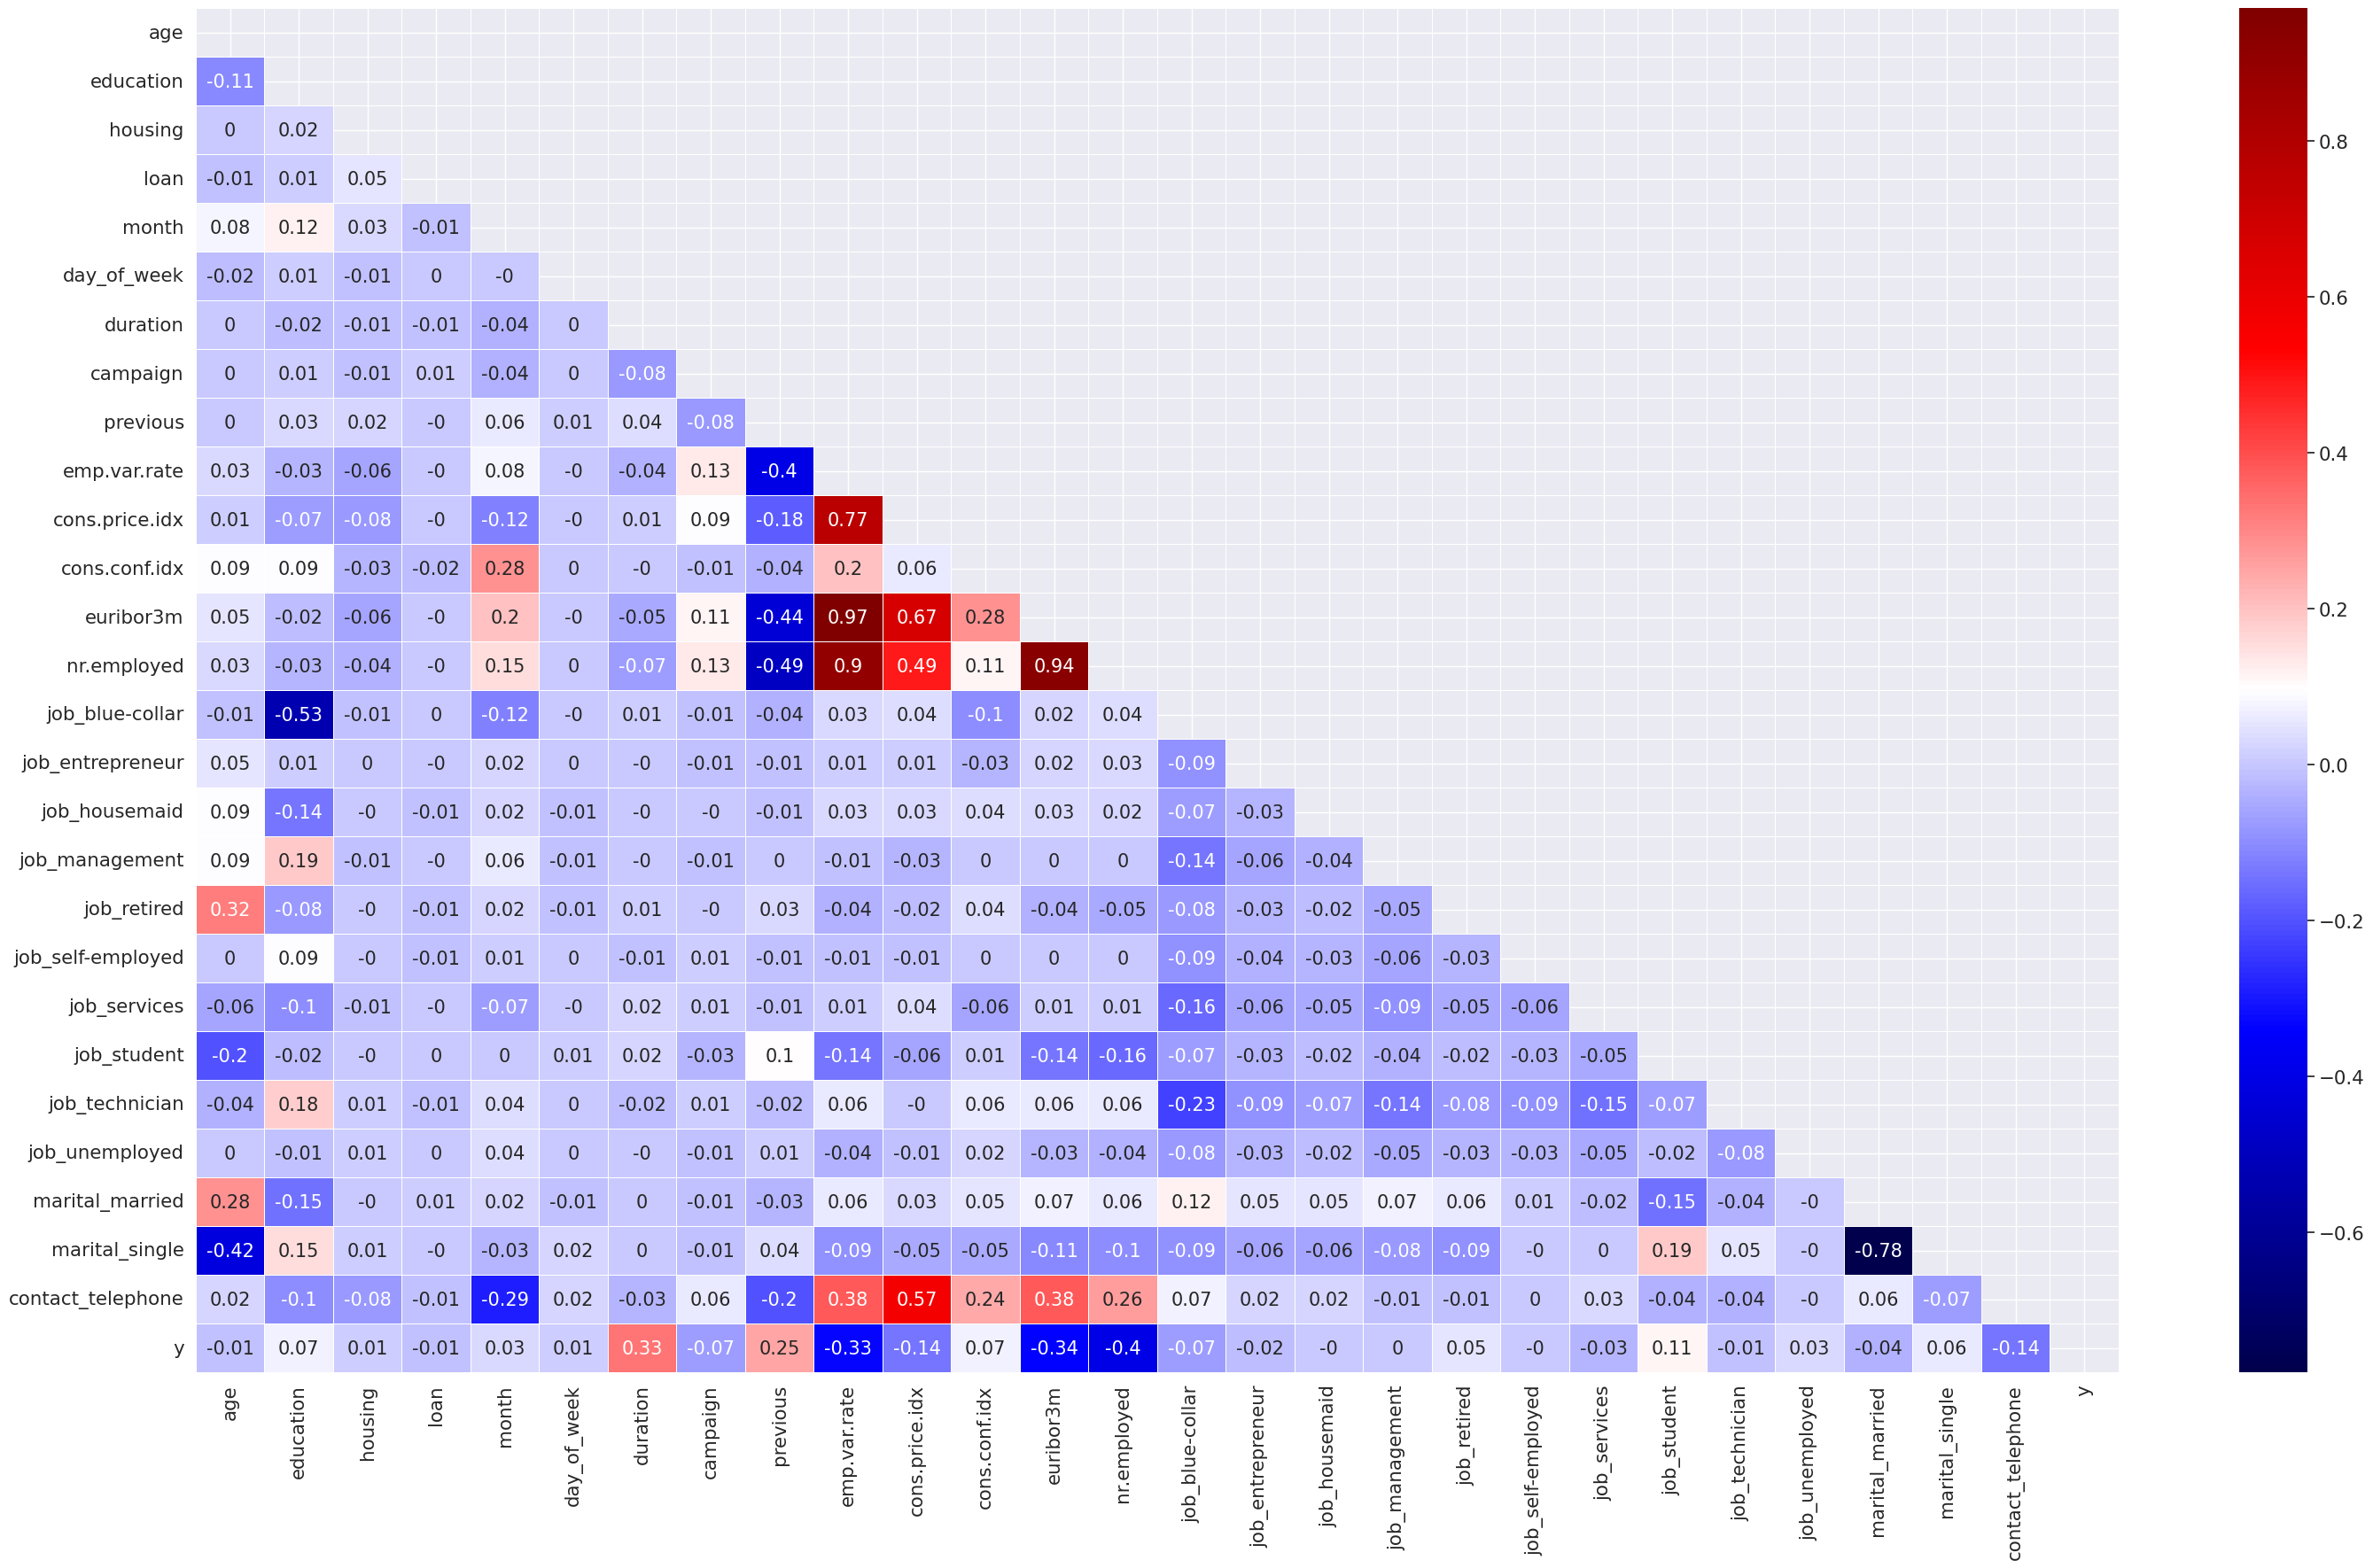

In [ ]:
corr_matrix = encoded_data.corr().round(2)
heat_mask = np.zeros_like(corr_matrix, dtype=bool)
heat_mask[np.triu_indices_from(heat_mask)] = True

sns.set(font_scale=1.4)
plt.figure(figsize = (35, 20))
sns.heatmap(encoded_data.corr().round(2), cmap='seismic', linewidths=0.5, mask=heat_mask, annot=True, annot_kws={"size": 15})

In [ ]:
sns.set(font_scale=1)

In [ ]:
# drop correlated features to reduce multicollinearity
drop_cols = [
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'marital_single'
]
encoded_data = encoded_data.drop(drop_cols, axis=1)

In [ ]:
encoded_data.head()

,age,education,housing,loan,month,day_of_week,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,contact_telephone,y
0,56,1,0,0,2,0,261,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2,37,4,1,0,2,0,226,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,40,2,0,0,2,0,151,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,56,4,0,1,2,0,307,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
6,59,5,0,0,2,0,139,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
encoded_data.shape

(28232, 22)

### Feature Scaling

- Log-transformation scaling is done for the age and duration feature to reduce skewness in the data.
- Min-Max scaling is done for ordinal data to ensure data values are in the same range.

In [ ]:
scaled_df = encoded_data.copy()

In [ ]:
scaled_df['age'] = np.log(scaled_df['age'])

np.seterr(divide = 'ignore')

scaled_df['duration'] = np.where(scaled_df['duration'] > 0, np.log(scaled_df['duration']), 0)

np.seterr(divide = 'warn')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
discrete_cols = [
    'education', 'month', 'day_of_week', 'campaign', 'previous'
]

min_max_scaler = MinMaxScaler()

scaled_df[discrete_cols] = min_max_scaler.fit_transform(scaled_df[discrete_cols])

In [ ]:
scaled_df.describe()

,age,education,housing,loan,month,day_of_week,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,contact_telephone,y
count,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000,28232.000000
mean,3.620896,0.730383,0.542788,0.155674,0.410677,0.492624,5.098088,0.128369,0.027340,0.188439,0.035988,0.022421,0.077111,0.026211,0.035988,0.095282,0.020650,0.182984,0.024795,0.572152,0.331291,0.101976
std,0.239570,0.255437,0.498175,0.362553,0.237282,0.352382,0.842280,0.178568,0.073941,0.391069,0.186262,0.148052,0.266772,0.159766,0.186262,0.293609,0.142213,0.386660,0.155501,0.494775,0.470686,0.302623
min,2.833213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.433987,0.500000,0.000000,0.000000,0.222222,0.250000,4.615121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.583519,0.666667,1.000000,0.000000,0.333333,0.500000,5.156173,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.806662,1.000000,1.000000,0.000000,0.555556,0.750000,5.683580,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,4.189655,1.000000,1.000000,1.000000,1.000000,1.000000,6.670766,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Balancing Dataset

- Before beginning to train the prediction models, SMOTE is used to balance the data to ensure better results.

In [ ]:
X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
print("Actual Classes", Counter(y))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({0: 25353, 1: 2879})
SMOTE Classes Counter({0: 25353, 1: 25353})


## Data Modeling

### Machine Learning Model Training
- The following classification models will be trained and tested using the data:
  - Logistic Regression
  - K-Nearest Neighbors
  - Bernoulli Naive Bayes
  - Decision Tree Classifier
  - Support Vector Machine
  - Bagging Classifier
  - Random Forest Classifier
  - AdaBoost Classifier
  - Gradient Boosting Classifier

#### Hyperparameter Tuning and Cross Validation
- GridSearchCV will be used to find the best model hyperparameters.
- 10-fold cross validation will be used to evaluate the model.
- The model will be evaluated using the following:
  - Accuracy Score
  - Precision Score
  - Recall Score
  - F1 Score
  - ROC AUC Score

### Split Data in Train and Test Set

In [ ]:
# data is split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40564, 21) (40564,)
(10142, 21) (10142,)


### Fit Models on Train Data with Grid Search Hyperparameter Tuning and Evaluate using Train data, Test data and Cross Validation

In [ ]:
# function to run grid search for best model and evaluate the model on train and test data
def get_best_model(model, params):
  grid = GridSearchCV(model, params, cv=5, verbose=1, scoring="accuracy", n_jobs=-1)
  grid.fit(X_train, y_train)
  print(f'Best Grid Search Model: {grid.best_estimator_}')
  print(f'Best Grid Search Score: {grid.best_score_}')
  print()

  best_model = grid.best_estimator_
  best_model.fit(X_train, y_train)

  print('Train Data Evaluation')
  y_pred = best_model.predict(X_train)
  print(f'Accuracy Score: {accuracy_score(y_train, y_pred)}')
  print(f'Precision Score: {precision_score(y_train, y_pred)}')
  print(f'Recall Score: {recall_score(y_train, y_pred)}')
  print(f'F1 Score: {f1_score(y_train, y_pred)}')
  print(f'ROC AUC Score: {roc_auc_score(y_train, y_pred)}')
  cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring="accuracy")
  print(f'10-fold Cross Validation Score: {np.mean(cv_scores)}')
  print()

  print('Test Data Evaluation')
  y_pred = best_model.predict(X_test)
  print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
  print(f'Precision Score: {precision_score(y_test, y_pred)}')
  print(f'Recall Score: {recall_score(y_test, y_pred)}')
  print(f'F1 Score: {f1_score(y_test, y_pred)}')
  print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
  cv_scores = cross_val_score(best_model, X_test, y_test, cv=10, scoring="accuracy")
  print(f'10-fold Cross Validation Score: {np.mean(cv_scores)}')
  print()

  print('Classification Report for Test Data')
  print(classification_report(y_test, y_pred))
  print()

  cm = confusion_matrix(y_test, y_pred)
  plt.figure()
  ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  ax.xaxis.set_ticklabels(['No','Yes'], fontsize=14)
  ax.yaxis.set_ticklabels(['No','Yes'], fontsize=14)
  plt.title('Confusion Matrix\n', fontsize=16)
  plt.xlabel('\nPredicted Values', fontsize=16)
  plt.ylabel('Actual Values\n', fontsize=16)
  plt.show()

  return best_model

#### Logistic Regression

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Grid Search Model: LogisticRegression(C=5, n_jobs=-1, random_state=42, solver='newton-cg', tol=10)
Best Grid Search Score: 0.7953112787303402

Train Data Evaluation
Accuracy Score: 0.7950892416921408
Precision Score: 0.7846190476190477
Recall Score: 0.8130366130464818
F1 Score: 0.7985750981437504
ROC AUC Score: 0.7951033887973566
10-fold Cross Validation Score: 0.7950645243154866

Test Data Evaluation
Accuracy Score: 0.7939262472885033
Precision Score: 0.7831097676176082
Recall Score: 0.814822095537645
F1 Score: 0.7986512524084779
ROC AUC Score: 0.7938601081051231
10-fold Cross Validation Score: 0.7945166681240952

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5055
           1       0.78      0.81      0.80      5087

    accuracy                           0.79     10142
   macro avg       0.79      0.79      0.79     10142


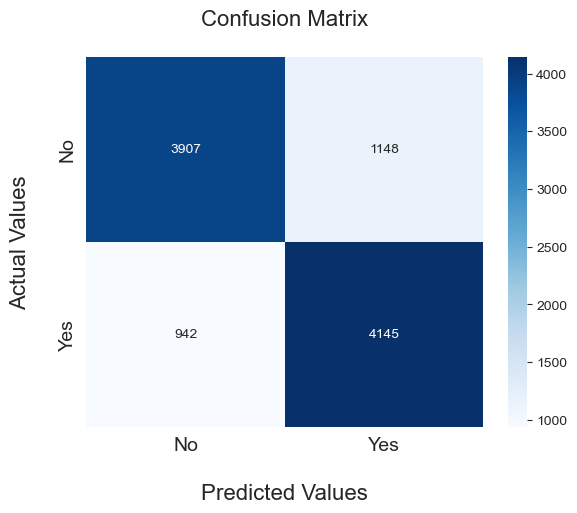

In [ ]:
log_reg = LogisticRegression(random_state=42, n_jobs=-1)
log_reg_params = {
    'tol': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'C': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

lr_best_model = get_best_model(log_reg, log_reg_params)

#### K-Nearest Neighbors

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Grid Search Model: KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1,
                     weights='distance')
Best Grid Search Score: 0.9321318288689033

Train Data Evaluation
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
10-fold Cross Validation Score: 0.9368894632162299

Test Data Evaluation
Accuracy Score: 0.9437980674423191
Precision Score: 0.9110100090991811
Recall Score: 0.9840770591704344
F1 Score: 0.9461349461349462
ROC AUC Score: 0.9436705770629621
10-fold Cross Validation Score: 0.8720166924145705

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5055
           1       0.91      0.98      0.95      5087

    accuracy                           0.94     10142
   macro avg       0.95      0.94      0.94     10142
weighted avg       0.95      0.94      0.94   

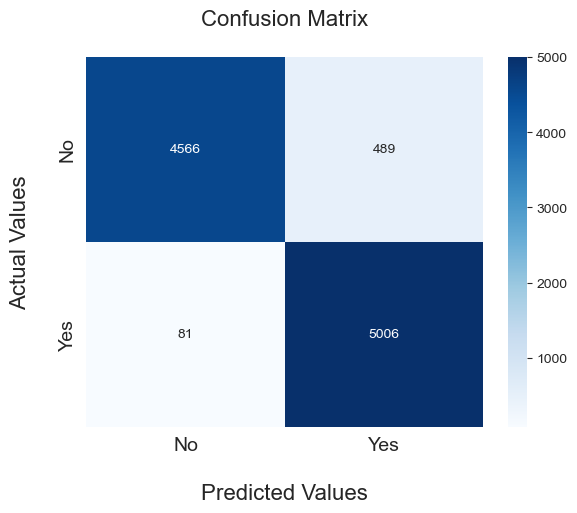

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_params = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

knn_best_model = get_best_model(knn_clf, knn_params)

#### Bernoulli Naive Bayes

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Grid Search Model: BernoulliNB(alpha=5)
Best Grid Search Score: 0.7158072848480693

Train Data Evaluation
Accuracy Score: 0.7173602208855142
Precision Score: 0.7439166343329083
Recall Score: 0.6622421790190467
F1 Score: 0.7007074425039809
ROC AUC Score: 0.7173167738133956
10-fold Cross Validation Score: 0.7161028324677099

Test Data Evaluation
Accuracy Score: 0.7178071386314336
Precision Score: 0.7414803559800304
Recall Score: 0.671515628071555
F1 Score: 0.704765834536827
ROC AUC Score: 0.7179536597331069
10-fold Cross Validation Score: 0.7178065700877372

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5055
           1       0.74      0.67      0.70      5087

    accuracy                           0.72     10142
   macro avg       0.72      0.72      0.72     10142
weighted avg       0.72      0.72      0.72     10142




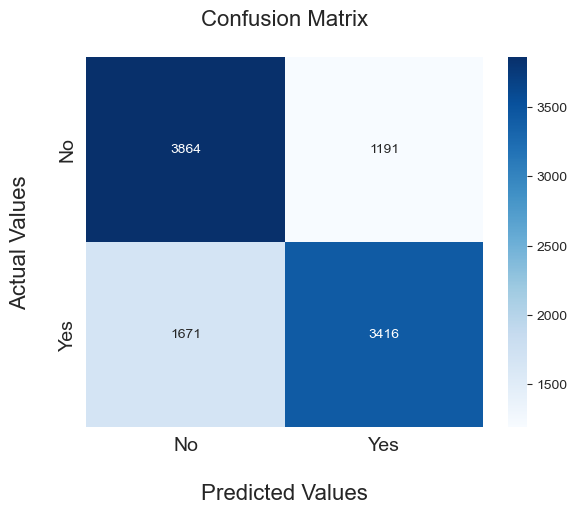

In [ ]:
bern_NB_clf = BernoulliNB()
bern_NB_params = {
    'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
}

bern_NB_best_model = get_best_model(bern_NB_clf, bern_NB_params)

#### Decision Tree

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Grid Search Model: DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=42)
Best Grid Search Score: 0.8346814570133745

Train Data Evaluation
Accuracy Score: 0.8561778917266541
Precision Score: 0.8562401263823065
Recall Score: 0.8558176255797888
F1 Score: 0.8560288238487734
ROC AUC Score: 0.8561776077450625
10-fold Cross Validation Score: 0.8247955174269617

Test Data Evaluation
Accuracy Score: 0.8495365805561034
Precision Score: 0.8498722735311456
Recall Score: 0.850206408492235
F1 Score: 0.8500393081761005
ROC AUC Score: 0.8495344604281155
10-fold Cross Validation Score: 0.8276440182275726

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5055
           1       0.85      0.85      0.85      5087

    accuracy                           0.85     10142
   macro avg       0.85      0.85      0.85     10142
weight

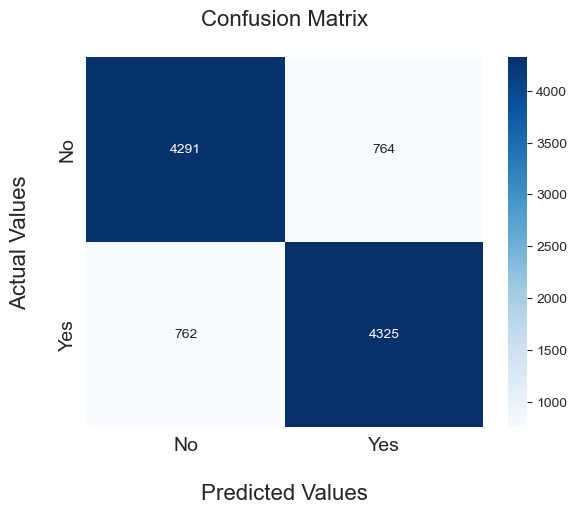

In [ ]:
dtree_clf = DecisionTreeClassifier(random_state=42)
dtree_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1,11),
    'max_features': ['sqrt', 'log2'],
}

dtree_best_model = get_best_model(dtree_clf, dtree_params)

#### Support Vector Machine

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Grid Search Model: SVC(C=10, kernel='poly', probability=True, random_state=42)
Best Grid Search Score: 0.8128144927018293

Train Data Evaluation
Accuracy Score: 0.8159205206587121
Precision Score: 0.7951935052354814
Recall Score: 0.8506365340965163
F1 Score: 0.8219811658123732
ROC AUC Score: 0.8159478857299017
10-fold Cross Validation Score: 0.8137017483600312

Test Data Evaluation
Accuracy Score: 0.813251824097811
Precision Score: 0.7919180837447432
Recall Score: 0.8513858855907215
F1 Score: 0.8205759757483895
ROC AUC Score: 0.813131122815143
10-fold Cross Validation Score: 0.8038846299589005

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      5055
           1       0.79      0.85      0.82      5087

    accuracy                           0.81     10142
   macro avg       0.82      0.81      0.81     10142
weighted avg       0.81

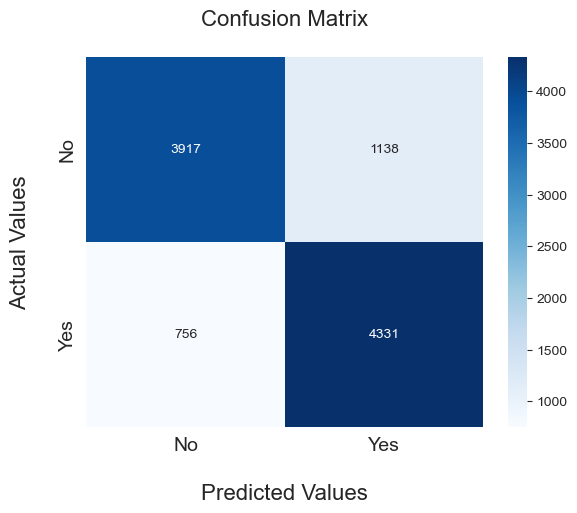

In [ ]:
svc_clf = SVC(random_state=42, probability=True)
svc_params = {
    'C': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
}

svc_best_model = get_best_model(svc_clf, svc_params)

#### Bagging Classifier

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Grid Search Model: BaggingClassifier(max_features=0.5, n_estimators=1000, n_jobs=-1,
                  random_state=42)
Best Grid Search Score: 0.95030077801449

Train Data Evaluation
Accuracy Score: 0.988487328665812
Precision Score: 1.0
Recall Score: 0.9769564788315405
F1 Score: 0.9883439410957193
ROC AUC Score: 0.9884782394157703
10-fold Cross Validation Score: 0.9498571150066193

Test Data Evaluation
Accuracy Score: 0.947249063301124
Precision Score: 0.9903059026281775
Recall Score: 0.9036760369569491
F1 Score: 0.9450097646212354
ROC AUC Score: 0.947386979902807
10-fold Cross Validation Score: 0.9453747048707261

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5055
           1       0.99      0.90      0.95      5087

    accuracy                           0.95     10142
   macro avg       0.95      0.95      0.95     10142


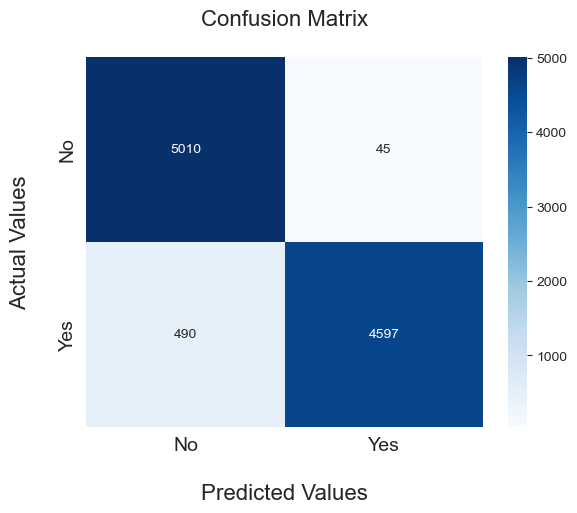

In [ ]:
bagging_clf = BaggingClassifier(random_state=42, n_jobs=-1)
bagging_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'max_samples': [0.05, 0.1, 0.5, 1.],
    'max_features': [0.05, 0.1, 0.5, 1.],
}

bagging_best_model = get_best_model(bagging_clf, bagging_params)

#### Random Forest Classifier

Fitting 5 folds for each of 330 candidates, totalling 1650 fits
Best Grid Search Model: RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
Best Grid Search Score: 0.9558722200787642

Train Data Evaluation
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
10-fold Cross Validation Score: 0.9574004727504851

Test Data Evaluation
Accuracy Score: 0.9576020508775389
Precision Score: 0.9580956128270707
Recall Score: 0.9573422449380774
F1 Score: 0.9577187807276303
ROC AUC Score: 0.9576028732108784
10-fold Cross Validation Score: 0.9361070141176242

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5055
           1       0.96      0.96      0.96      5087

    accuracy                           0.96     10142
   macro avg       0.96      0.96      0.96     10142
weighted avg       0.96      0.96      0.96     10142




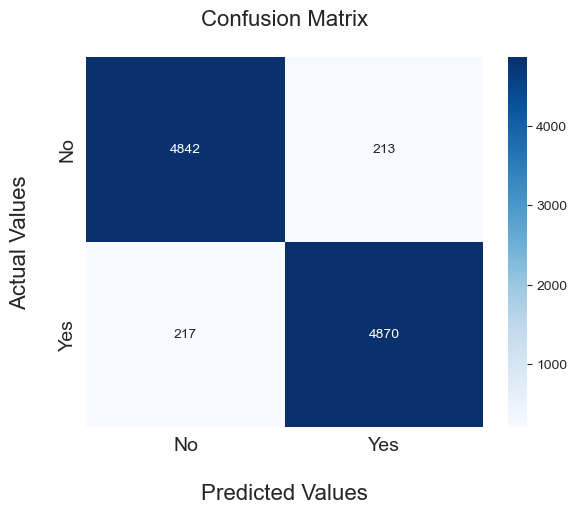

In [ ]:
rand_forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
rand_forest_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(1,11)) + [None],
    'max_features': ['sqrt', 'log2'],
}

rf_best_model = get_best_model(rand_forest_clf, rand_forest_params)

#### AdaBoost Classifier

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Grid Search Model: AdaBoostClassifier(learning_rate=1, n_estimators=1000, random_state=42)
Best Grid Search Score: 0.9418943098117785

Train Data Evaluation
Accuracy Score: 0.9434720441771028
Precision Score: 0.9668069191210846
Recall Score: 0.9183854732063554
F1 Score: 0.9419743401574006
ROC AUC Score: 0.9434522695620899
10-fold Cross Validation Score: 0.9419190247066093

Test Data Evaluation
Accuracy Score: 0.9404456714651942
Precision Score: 0.964945032151006
Recall Score: 0.9144879103597405
F1 Score: 0.9390391602745256
ROC AUC Score: 0.9405278325290295
10-fold Cross Validation Score: 0.9383743842364533

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5055
           1       0.96      0.91      0.94      5087

    accuracy                           0.94     10142
   macro avg       0.94      0.94      0.94     10142
weighted a

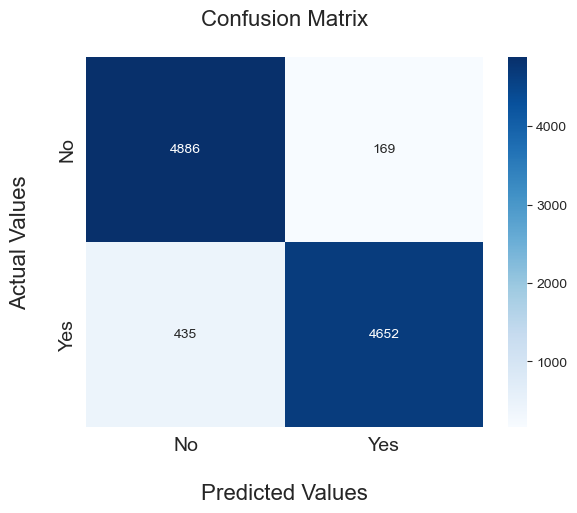

In [ ]:
ada_clf = AdaBoostClassifier(random_state=42)
ada_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
}

ada_best_model = get_best_model(ada_clf, ada_params)

#### Gradient Boosting Classifier

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Grid Search Model: GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           max_features='sqrt', n_estimators=1000,
                           random_state=42)
Best Grid Search Score: 0.9462824262859106

Train Data Evaluation
Accuracy Score: 0.9784538014002564
Precision Score: 0.987628243814122
Recall Score: 0.9690121385571894
F1 Score: 0.9782316313823164
ROC AUC Score: 0.9784463589623075
10-fold Cross Validation Score: 0.9456906184990123

Test Data Evaluation
Accuracy Score: 0.9448826661408006
Precision Score: 0.954983922829582
Recall Score: 0.9341458620011794
F1 Score: 0.9444499652191195
ROC AUC Score: 0.9449166500905996
10-fold Cross Validation Score: 0.9370929159258072

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5055
           1       0.95      0.93      0.94      5087

    accuracy  

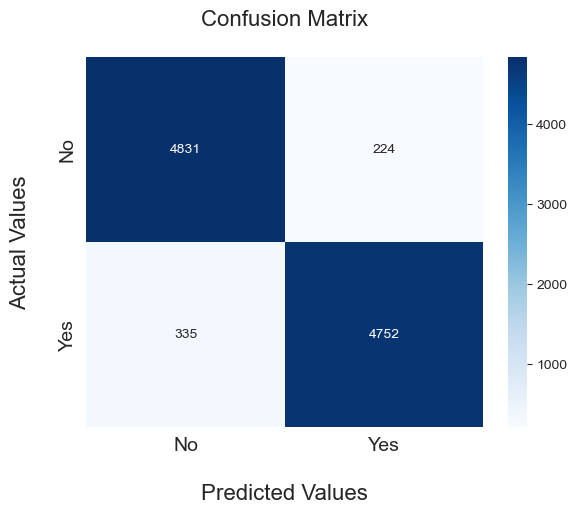

In [ ]:
grad_boost_clf = GradientBoostingClassifier(random_state=42)
grad_boost_params = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1],
    'n_estimators':  [10, 50, 100, 500, 1000],
    'subsample': [0.05, 0.1, 0.5, 1.],
    'max_features': ['sqrt', 'log2'],
}

grad_best_model = get_best_model(grad_boost_clf, grad_boost_params)

## Model Evaluation

### Grid Search Best Models

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
# store model metrics in a dataframe
grid_df = pd.DataFrame({
    'Model': ['Logisitic Regression', 'K-Nearest Neighbors', 'Bernoulli Naive Bayes', 'Decision Tree', 'Support Vector Machine',
              'Bagging Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', ],
    'Hyperparameters Tuned': [
        ['tol', 'C', 'solver'],
        ['n_neighbors', 'weights', 'algorithm', 'metric'],
        ['alpha'],
        ['criterion', 'splitter', 'max_depth', 'max_features'],
        ['C', 'kernel'],
        ['n_estimators', 'max_samples', 'max_features'],
        ['n_estimators', 'criterion', 'max_depth', 'max_features'],
        ['n_estimators', 'learning_rate'],
        ['loss', 'learning_rate', 'n_estimators', 'subsample', 'max_features']
    ],
    'Best Model': [
        "LogisticRegression(C=5, n_jobs=-1, random_state=42, solver='newton-cg', tol=10)",
        "KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1, weights='distance')",
        "BernoulliNB(alpha=5)",
        "DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=42)",
        "SVC(C=10, kernel='poly', probability=True, random_state=42)",
        "BaggingClassifier(max_features=0.5, n_estimators=1000, n_jobs=-1, random_state=42)",
        "RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)",
        "AdaBoostClassifier(learning_rate=1, n_estimators=1000, random_state=42)",
        "GradientBoostingClassifier(learning_rate=1, loss='exponential', max_features='sqrt', n_estimators=1000, random_state=42)"
    ],
    'Best Model Score': [0.7953, 0.9321, 0.7158, 0.8348, 0.8128, 0.9503, 0.9558, 0.9418, 0.9462],
})

In [ ]:
grid_df

,Model,Hyperparameters Tuned,Best Model,Best Model Score
0,Logisitic Regression,"[tol, C, solver]","LogisticRegression(C=5, n_jobs=-1, random_state=42, solver='newton-cg', tol=10)",0.7953
1,K-Nearest Neighbors,"[n_neighbors, weights, algorithm, metric]","KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1, weights='distance')",0.9321
2,Bernoulli Naive Bayes,[alpha],BernoulliNB(alpha=5),0.7158
3,Decision Tree,"[criterion, splitter, max_depth, max_features]","DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=42)",0.8348
4,Support Vector Machine,"[C, kernel]","SVC(C=10, kernel='poly', probability=True, random_state=42)",0.8128
5,Bagging Classifier,"[n_estimators, max_samples, max_features]","BaggingClassifier(max_features=0.5, n_estimators=1000, n_jobs=-1, random_state=42)",0.9503
6,Random Forest Classifier,"[n_estimators, criterion, max_depth, max_features]","RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)",0.9558
7,AdaBoost Classifier,"[n_estimators, learning_rate]","AdaBoostClassifier(learning_rate=1, n_estimators=1000, random_state=42)",0.9418
8,Gradient Boosting Classifier,"[loss, learning_rate, n_estimators, subsample, max_features]","GradientBoostingClassifier(learning_rate=1, loss='exponential', max_features='sqrt', n_estimators=1000, random_state=42)",0.9462


Top 5 models based on Grid Search best model score:
- Random Forest Classifier
- Bagging Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier
- K-Nearest Neighbors

### Model Cross Validation Comparison

In [ ]:
cross_val_comp_df = pd.DataFrame({
    'Model': ['Logisitic Regression', 'K-Nearest Neighbors', 'Bernoulli Naive Bayes', 'Decision Tree', 'Support Vector Machine',
              'Bagging Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', ],
    'Train Cross Val Score': [0.7950, 0.9368, 0.7161, 0.8247, 0.8137, 0.9498, 0.9574, 0.9419, 0.9456, ],
    'Test Cross Val Score': [0.7945, 0.8720, 0.7178, 0.8276, 0.8038, 0.9453, 0.9361, 0.9383, 0.9370, ],
})

In [ ]:
cross_val_comp_df

,Model,Train Cross Val Score,Test Cross Val Score
0,Logisitic Regression,0.7950,0.7945
1,K-Nearest Neighbors,0.9368,0.8720
2,Bernoulli Naive Bayes,0.7161,0.7178
3,Decision Tree,0.8247,0.8276
4,Support Vector Machine,0.8137,0.8038
5,Bagging Classifier,0.9498,0.9453
6,Random Forest Classifier,0.9574,0.9361
7,AdaBoost Classifier,0.9419,0.9383
8,Gradient Boosting Classifier,0.9456,0.9370


#### Observations
- The train and test cross val scores of the models appear to be roughly equal, so there is no overfitting in any of the models.
- Best models by Train cross val score:
  1. Random Forest Classifier
  2. Bagging Classifier
  3. Gradient Boosting Classifier
  4. Ada Boost Classifier
  5. K- Nearest Neighbors
- Best models by Test cross val score:
  1. Bagging Classifier
  2. Ada Boost Classifier
  3. Gradient Boosting Classifier
  4. Random Forest Classifier
  5. K- Nearest Neighbors

### Model Metric Comparison

In [ ]:
# store model metrics in a dataframe
model_comp_df = pd.DataFrame({
    'Model': ['Logisitic Regression', 'K-Nearest Neighbors', 'Bernoulli Naive Bayes', 'Decision Tree', 'Support Vector Machine',
              'Bagging Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', ],
    'Train Accuracy Score': [0.7950, 1.0, 0.7173, 0.8561, 0.8159, 0.9884, 1.0, 0.9434, 0.9784, ],
    'Train Precision Score': [0.7846, 1.0, 0.7439, 0.8562, 0.7951, 1.0, 1.0, 0.9668, 0.9876, ],
    'Train Recall Score': [0.8130, 1.0, 0.6622, 0.8558, 0.8506, 0.9769, 1.0, 0.9183, 0.9690, ],
    'Train F1 Score': [0.7985, 1.0, 0.7007, 0.8560, 0.8219, 0.9883, 1.0, 0.9419, 0.9782, ],
    'Train ROC-AUC Score': [0.7951, 1.0, 0.7173, 0.8561, 0.8159, 0.9884, 1.0, 0.9434, 0.9784, ],
    'Test Accuracy Score': [0.7939, 0.9437, 0.7178, 0.8495, 0.8132, 0.9472, 0.9576, 0.9404, 0.9448, ],
    'Test Precision Score': [0.7831, 0.9110, 0.7414, 0.8498, 0.7919, 0.9903, 0.9580, 0.9649, 0.9549, ],
    'Test Recall Score': [0.8148, 0.9840, 0.6715, 0.8502, 0.8513, 0.9036, 0.9573, 0.9144, 0.9341, ],
    'Test F1 Score': [0.7986, 0.9461, 0.7047, 0.8500, 0.8205, 0.9450, 0.9577, 0.9390, 0.9444, ],
    'Test ROC-AUC Score': [0.7938, 0.9436, 0.7179, 0.8495, 0.8131, 0.9473, 0.9576, 0.9405, 0.9449, ],
})

In [ ]:
model_comp_df

,Model,Train Accuracy Score,Train Precision Score,Train Recall Score,Train F1 Score,Train ROC-AUC Score,Test Accuracy Score,Test Precision Score,Test Recall Score,Test F1 Score,Test ROC-AUC Score
0,Logisitic Regression,0.7950,0.7846,0.8130,0.7985,0.7951,0.7939,0.7831,0.8148,0.7986,0.7938
1,K-Nearest Neighbors,1.0000,1.0000,1.0000,1.0000,1.0000,0.9437,0.9110,0.9840,0.9461,0.9436
2,Bernoulli Naive Bayes,0.7173,0.7439,0.6622,0.7007,0.7173,0.7178,0.7414,0.6715,0.7047,0.7179
3,Decision Tree,0.8561,0.8562,0.8558,0.8560,0.8561,0.8495,0.8498,0.8502,0.8500,0.8495
4,Support Vector Machine,0.8159,0.7951,0.8506,0.8219,0.8159,0.8132,0.7919,0.8513,0.8205,0.8131
5,Bagging Classifier,0.9884,1.0000,0.9769,0.9883,0.9884,0.9472,0.9903,0.9036,0.9450,0.9473
6,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,0.9576,0.9580,0.9573,0.9577,0.9576
7,AdaBoost Classifier,0.9434,0.9668,0.9183,0.9419,0.9434,0.9404,0.9649,0.9144,0.9390,0.9405
8,Gradient Boosting Classifier,0.9784,0.9876,0.9690,0.9782,0.9784,0.9448,0.9549,0.9341,0.9444,0.9449


#### Observations
- Comparing the train and test scores of the models, there appears to be no overfitting in any of the models.

- Bernoulli Naive Bayes model has the lowest scores among all the models.
- Random Forest Classifier has the best test Accuracy Score.
- Bagging Classifier has the best test Precision Score.
- K-Nearest Neighbors has the best test Recall Score.
- Random Forest Classifier has the best test F1 Score.
- Random Forest Classifier has the best test ROC AUC Score.
- Random Forest Classifier is the best model overall.
- The Bagging Classifier, Gradient Boosting Classifier and K-Nearest Neighbors models have mostly similar scores and are second best overall.

### ROC Curve

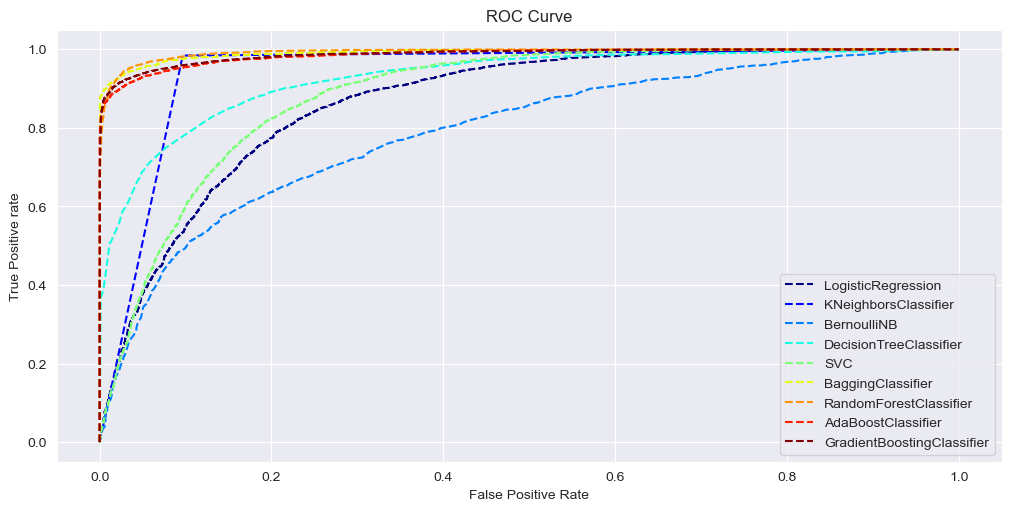

In [ ]:
n_lines = 9
cmap = mpl.colormaps['jet']
colors = cmap(np.linspace(0, 1, n_lines))

model_list = [
  lr_best_model, knn_best_model, bern_NB_best_model, dtree_best_model, svc_best_model,
  bagging_best_model, rf_best_model, ada_best_model, grad_best_model
]

fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

for color, model in zip(colors, model_list):
  pred_prob = model.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color=color, label=type(model).__name__)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

ROC Area under Curve is best for the folowing models:
  1. Random Forest Classifier
  2. Bagging Classifier
  3. Gradient Boosting Classifier
  4. AdaBoost Classifier

---